# Clustering

In [34]:
library(readxl)
library(tidyverse) #data Manipulation
library(cluster) #Clustering algorithms
library(factoextra)#Clustering Algorithms & Visualization
library(gridExtra)
#install.packages("dendextend")
#install.packages("ggplot2")
#install.packages("rlang")
library(dendextend) # For fancy deprograms
library(rlang) # clustering cutting
#install.packages('NbClust')
library(NbClust)
#install.packages('writexl')
library(writexl)
library(GGally)
#install.packages('ggiraphExtra')
library(ggiraphExtra)

Installing package into 'C:/Users/hichul/Documents/R/win-library/4.0'
(as 'lib' is unspecified)

also installing the dependencies 'insight', 'ggiraph', 'mycor', 'ppcor', 'sjlabelled', 'sjmisc'




package 'insight' successfully unpacked and MD5 sums checked
package 'ggiraph' successfully unpacked and MD5 sums checked
package 'mycor' successfully unpacked and MD5 sums checked
package 'ppcor' successfully unpacked and MD5 sums checked
package 'sjlabelled' successfully unpacked and MD5 sums checked
package 'sjmisc' successfully unpacked and MD5 sums checked
package 'ggiraphExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hichul\AppData\Local\Temp\RtmpMPksD2\downloaded_packages


Warning message:
"package 'ggiraphExtra' was built under R version 4.0.3"


In [11]:
dfsimple <- read_excel("C:/Users/hichul/Desktop/2020-2021/Fall of 2020/Independent Study/water-accessibility/results/dfsimple.xlsx",sheet=1)

dfsimple[is.na(dfsimple)] <- 0
head(dfsimple)

Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,liws,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,20.1,18.5,4.7,...,5.0,45.3,45.2,8.2,30.0,5.8,35.2,11.8,0.0,0.1
Albania,2018,DHS,98.4,48.8,5.2,2.4,1.4,4.1,2.5,...,0.9,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1
Angola,2016,DHS,66.9,4.3,9.7,10.3,1.9,9.1,3.3,...,7.5,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3
Armenia,2016,DHS,99.9,88.3,8.0,0.5,0.2,0.2,1.0,...,0.1,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1
Azerbaijan,2006,DHS,90.6,34.0,19.7,3.5,9.3,6.2,7.5,...,3.4,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,0.0
Bangladesh,2014,DHS,97.8,4.3,3.3,2.7,86.4,0.2,0.0,...,1.3,75.5,22.7,1.6,25.1,0.0,6.4,0.8,0.0,0.3


In [12]:
df.wa.country <- dfsimple[,c('Country','ptap','bore','pspr', 'uspr', 'pwel', 'uwel','surw','tles','tmor','rain','phom','imws','pipy','truc', 'ctan', 'bott', 'uiws','othw','iwsp','basw','liws','watp' )]
df.wa.country[is.na(df.wa.country)] <- 0
head(df.wa.country)
sapply(df.wa.country, class)

Country,ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,...,pipy,truc,ctan,bott,uiws,othw,iwsp,basw,liws,watp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,14.2,20.1,4.7,8.6,18.5,11.1,7.3,45.2,8.2,...,4.8,1.5,4.4,0.2,28.7,1.7,35.4,65.3,5.0,45.3
Albania,2.4,1.4,2.5,0.8,4.1,0.8,0.0,20.6,1.1,...,5.2,14.1,0.2,19.6,1.6,0.1,77.0,97.0,0.9,77.9
Angola,10.3,1.9,3.3,4.8,9.1,8.3,18.0,46.1,15.6,...,9.7,9.7,4.3,1.2,33.1,1.8,32.6,57.0,7.5,34.5
Armenia,0.5,0.2,1.0,0.1,0.2,0.0,0.0,1.6,0.1,...,8.0,1.5,0.0,0.0,0.1,0.0,97.6,99.1,0.1,97.6
Azerbaijan,3.5,9.3,7.5,1.1,6.2,0.2,7.0,18.7,4.4,...,19.7,9.5,0.7,0.1,9.4,1.1,71.2,86.4,3.4,75.9
Bangladesh,2.7,86.4,0.0,0.3,0.2,0.6,1.2,22.7,1.6,...,3.3,0.0,0.1,0.3,2.2,0.1,75.1,96.4,1.3,75.5


Country        ptap        bore        pspr        uspr        pwel 
"character"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 
       uwel        surw        tles        tmor        rain        phom 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 
       imws        pipy        truc        ctan        bott        uiws 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 
       othw        iwsp        basw        liws        watp 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"

To apply clustering, we want to only use water accessibility variables

In [13]:
write_xlsx(df.wa.country , 'C:/Users/hichul/Desktop/2020-2021/Fall of 2020/Independent Study/water-accessibility/results/df-water-access.xlsx')

In [14]:
df.explore <- dfsimple[,c('Country','bicy','cart','mcyc',
                         'pcar',
                         'boat',
                         'wigc')]
head(df.explore)

Country,bicy,cart,mcyc,pcar,boat,wigc
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,30.0,5.8,35.2,11.8,0.0,0.1
Albania,26.4,3.2,9.6,37.0,0.7,0.1
Angola,4.6,1.3,17.8,10.9,0.4,0.3
Armenia,8.6,0.4,0.2,39.2,0.3,0.1
Azerbaijan,6.9,3.3,1.1,20.4,0.1,0.0
Bangladesh,25.1,0.0,6.4,0.8,0.0,0.3


In [15]:
write_xlsx(df.explore , 'C:/Users/hichul/Desktop/2020-2021/Fall of 2020/Independent Study/water-accessibility/results/df-water-explore.xlsx')

linkage: single or average or complete and Different Methods

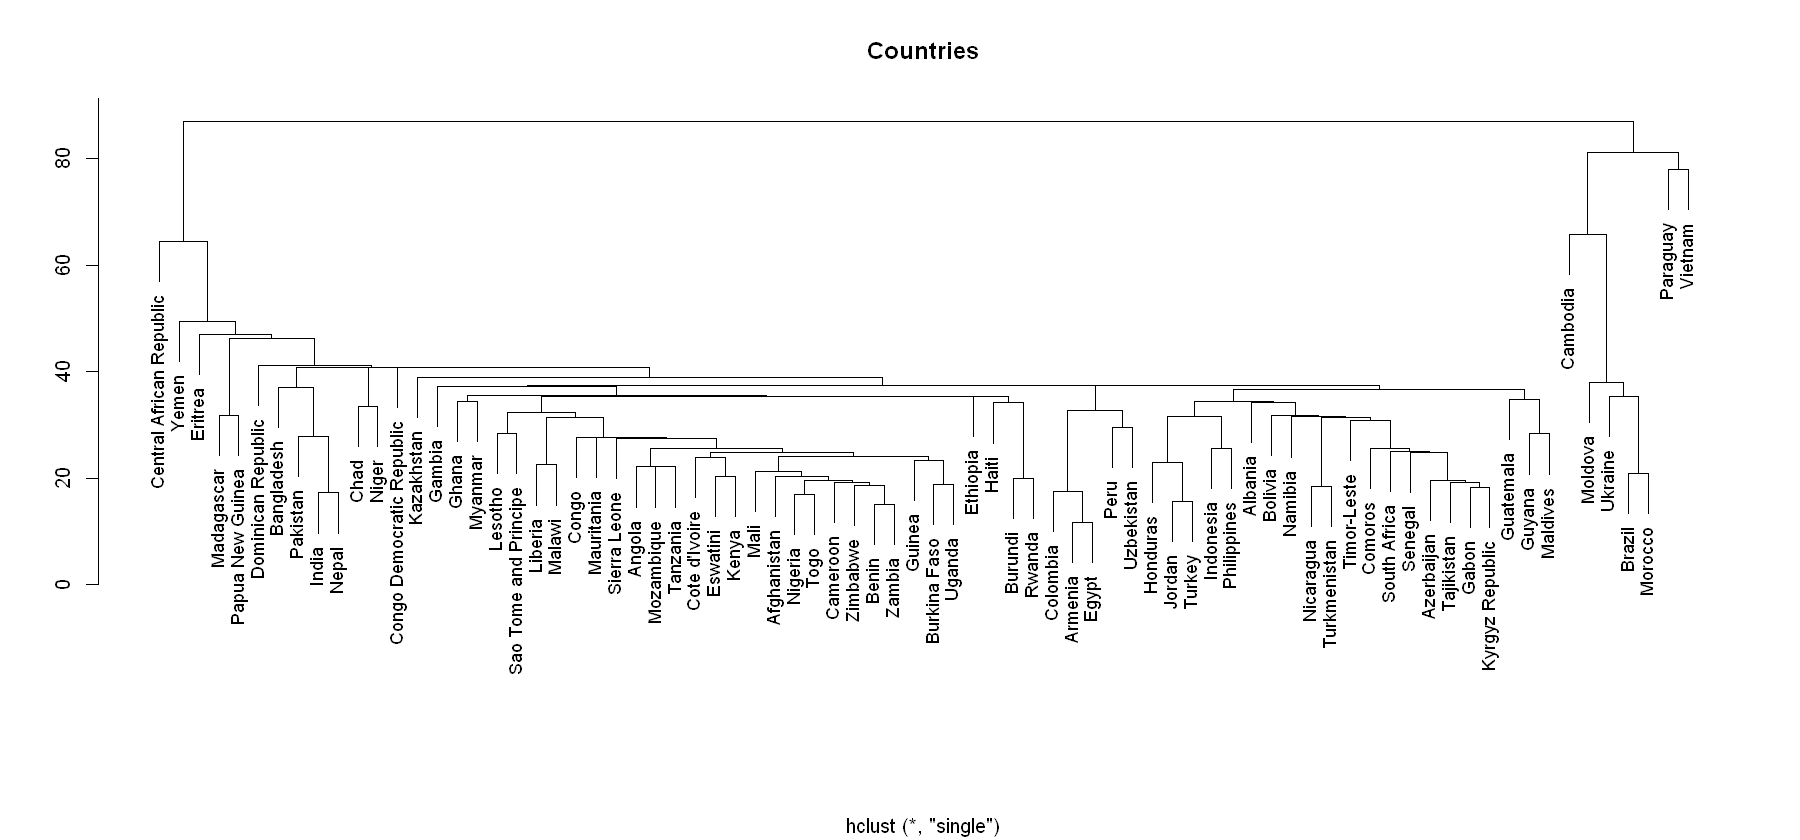

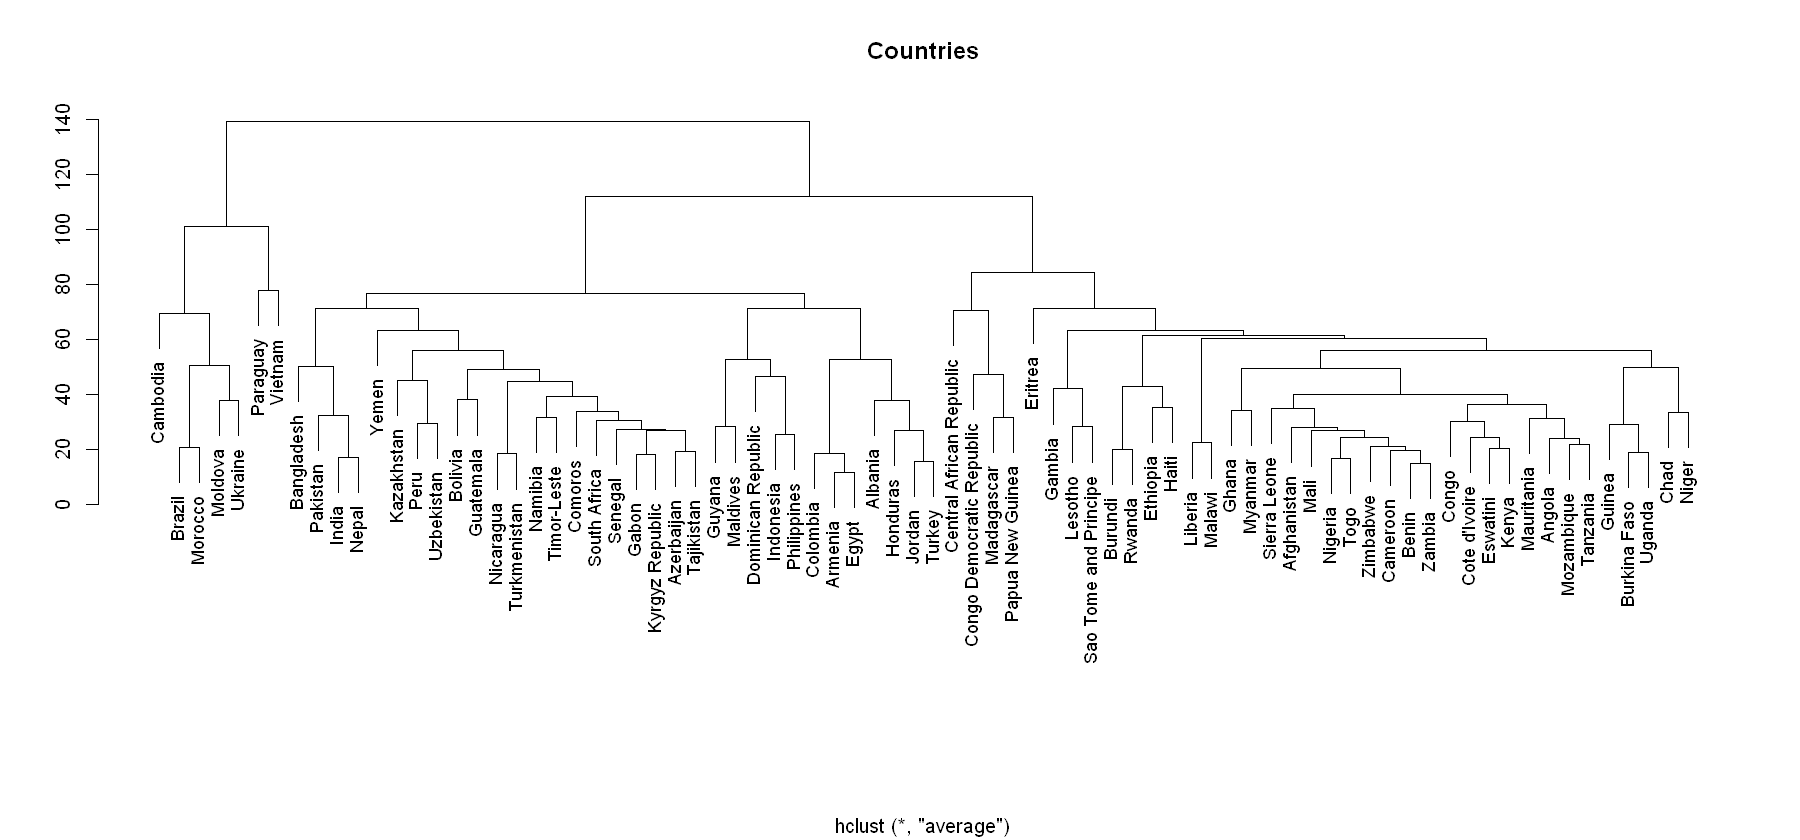

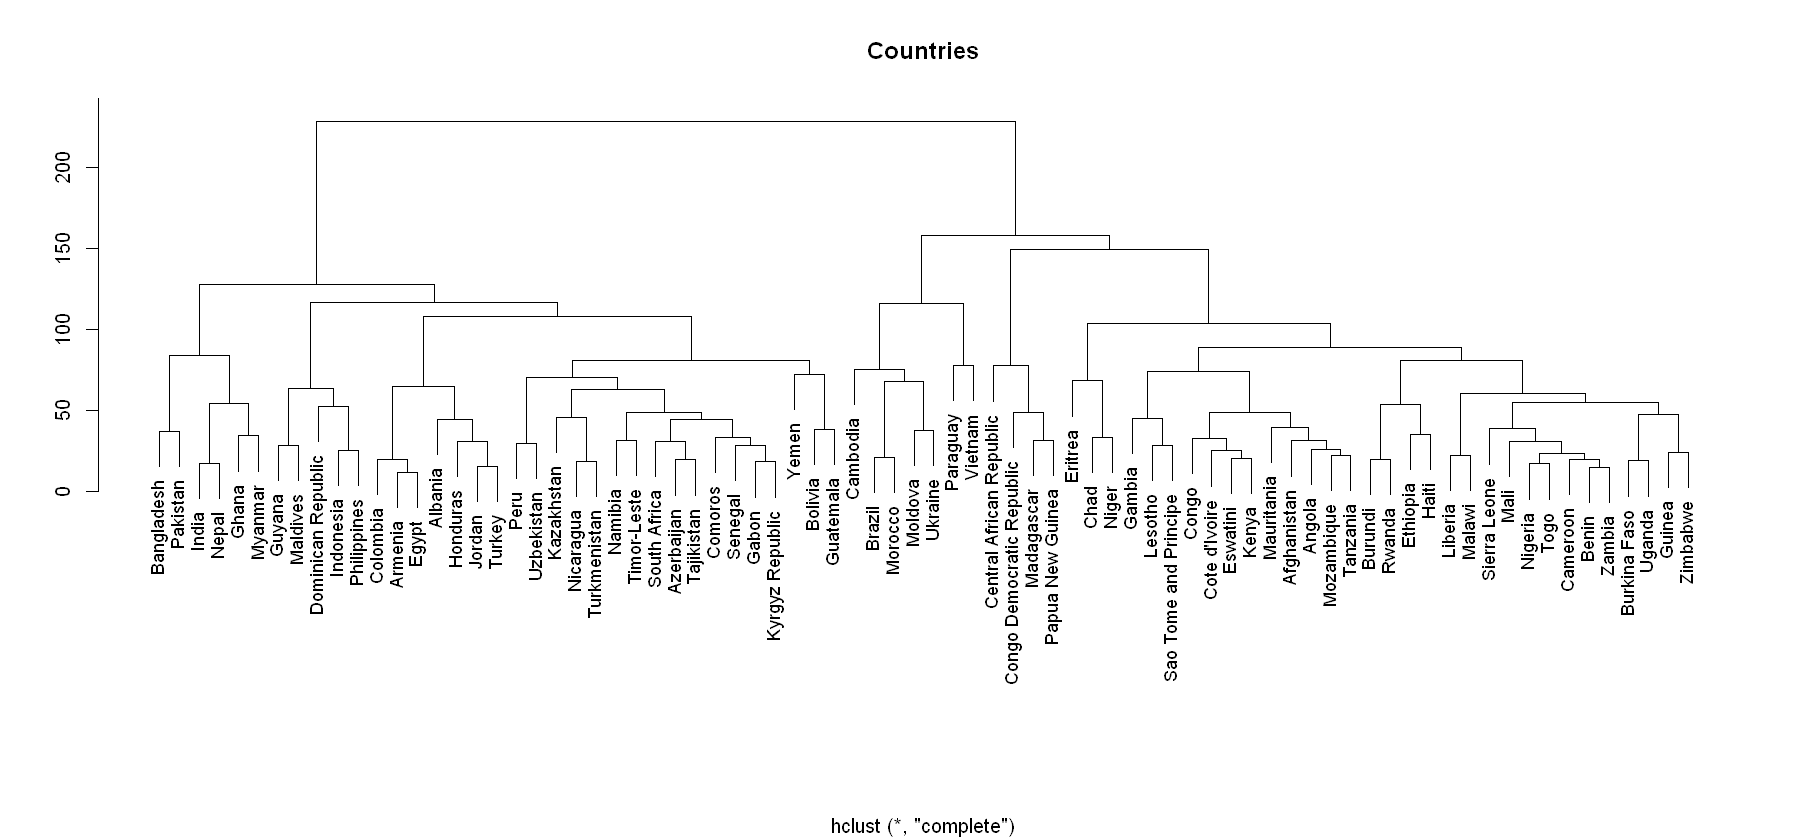

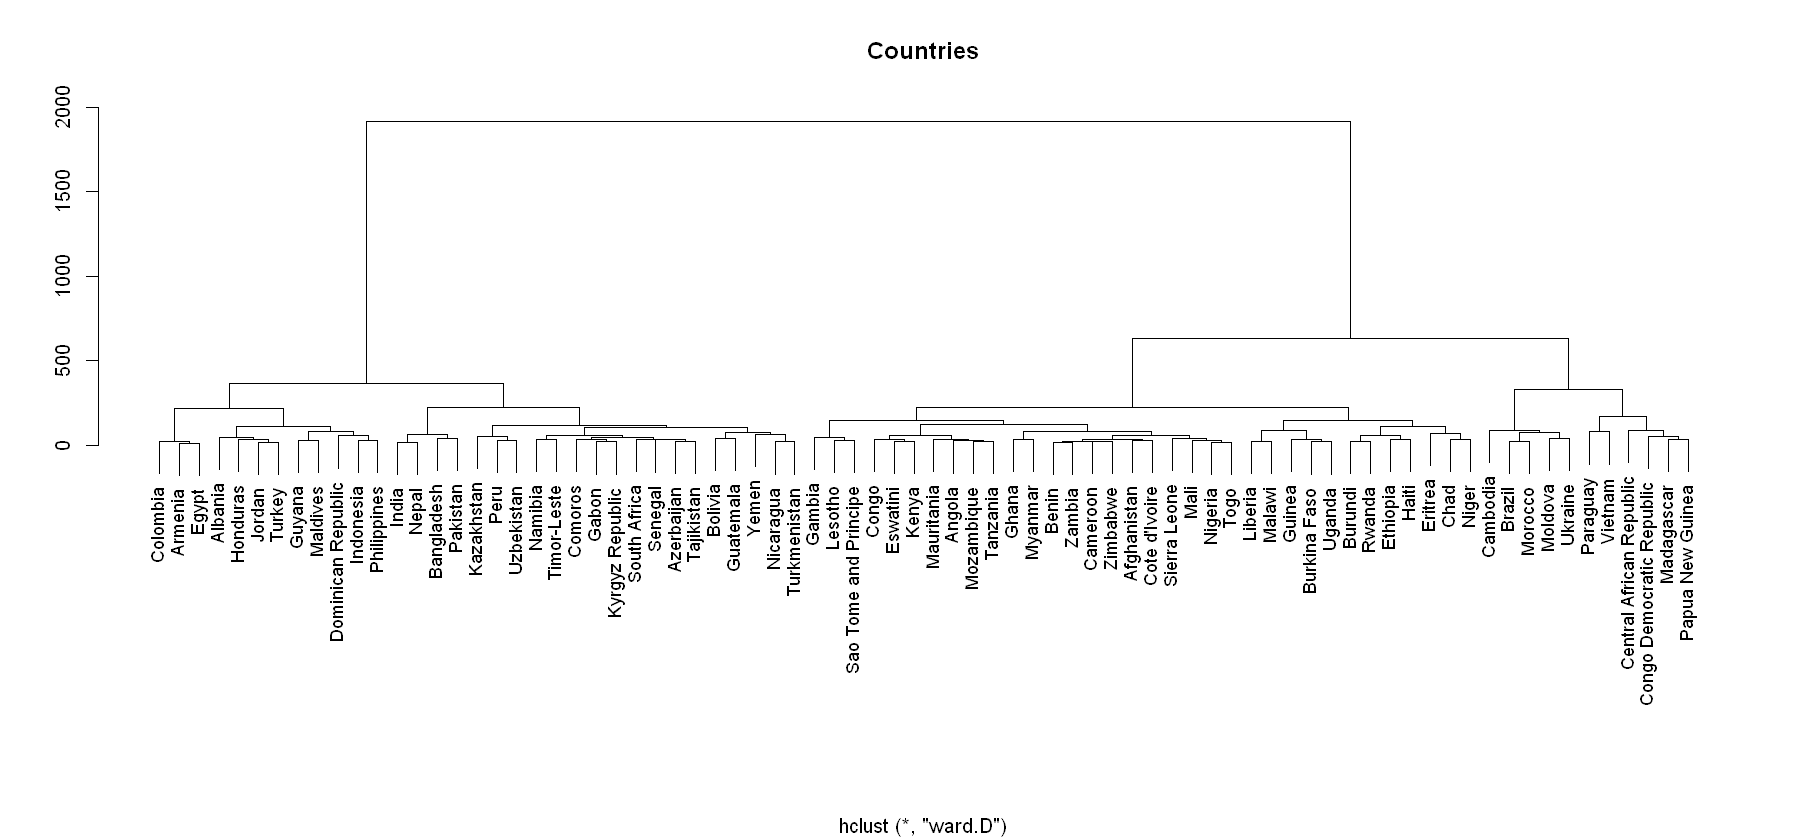

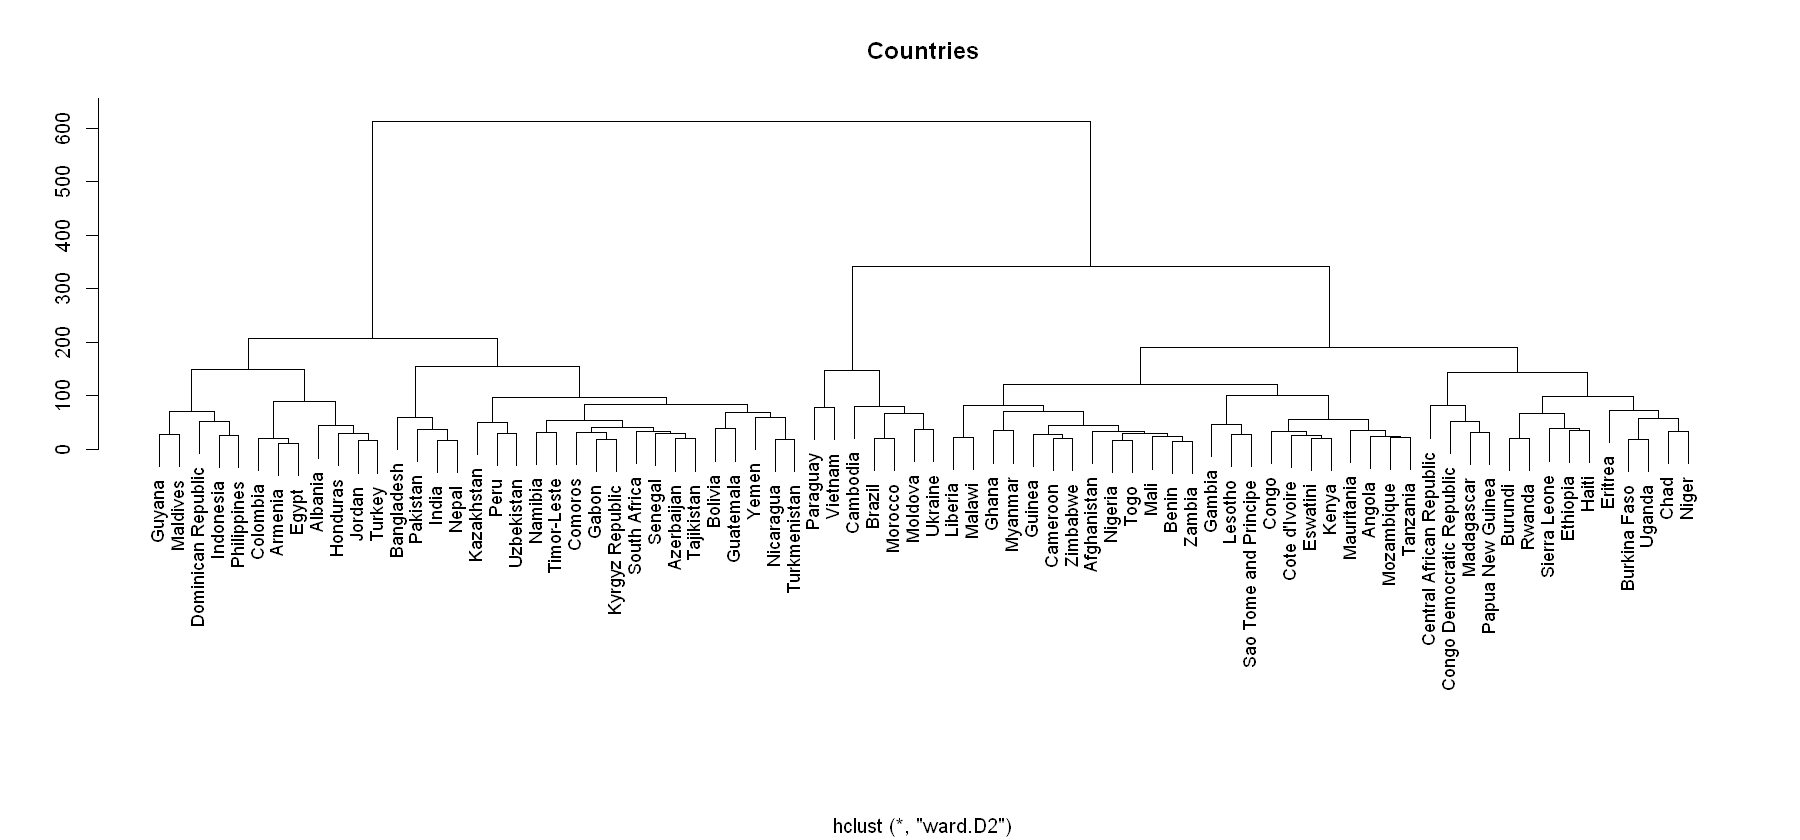

In [16]:
df.wa <- dfsimple[,c('ptap','bore','pspr', 'uspr', 'pwel', 'uwel','surw','tles','tmor','rain','phom','imws','pipy','truc', 'ctan', 'bott', 'uiws','othw','iwsp','basw','liws','watp' )]

hc=hclust(dist(df.wa), method ="single")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df.wa.country$Country)

hc=hclust(dist(df.wa), method ="average")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df.wa.country$Country)

hc.complete =hclust(dist(df.wa), method ="complete")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc.complete, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df.wa.country$Country)

hc.ward=hclust(dist(df.wa), method ="ward.D")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc.ward, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df.wa.country$Country)

hc.ward2=hclust(dist(df.wa), method ="ward.D2")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc.ward2, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df.wa.country$Country)

# Determining the Best Cut for different methods

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


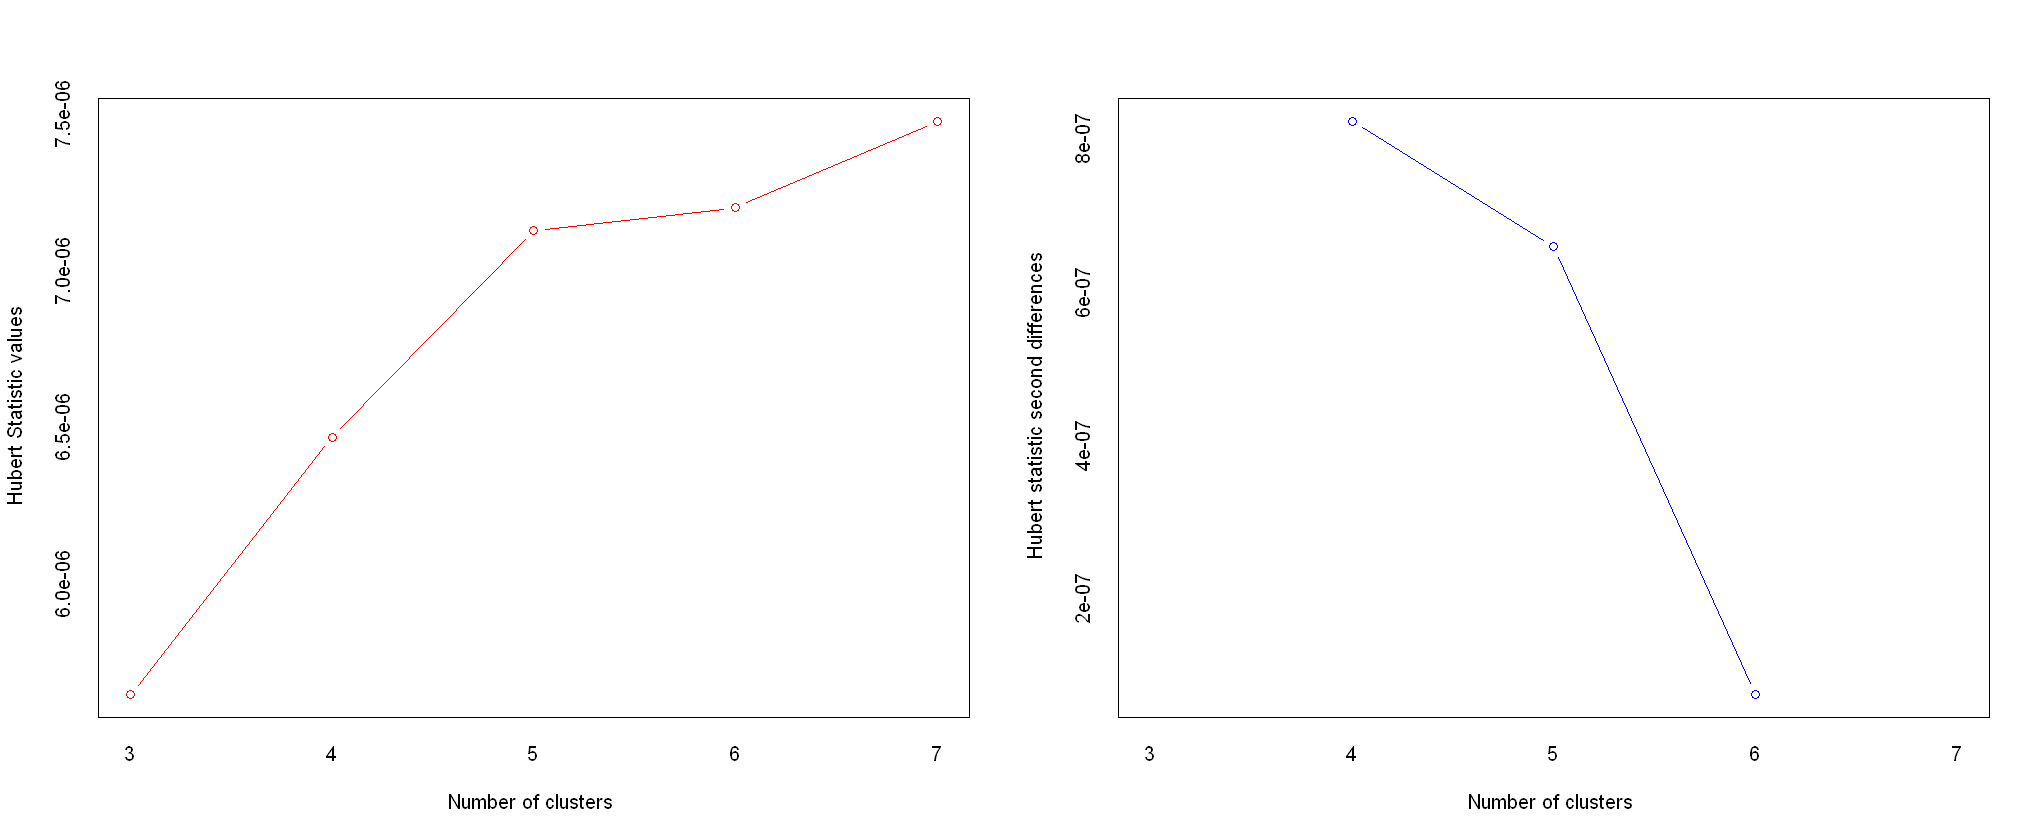

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 12 proposed 3 as the best number of clusters 
* 7 proposed 4 as the best number of clusters 
* 3 proposed 5 as the best number of clusters 
* 3 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


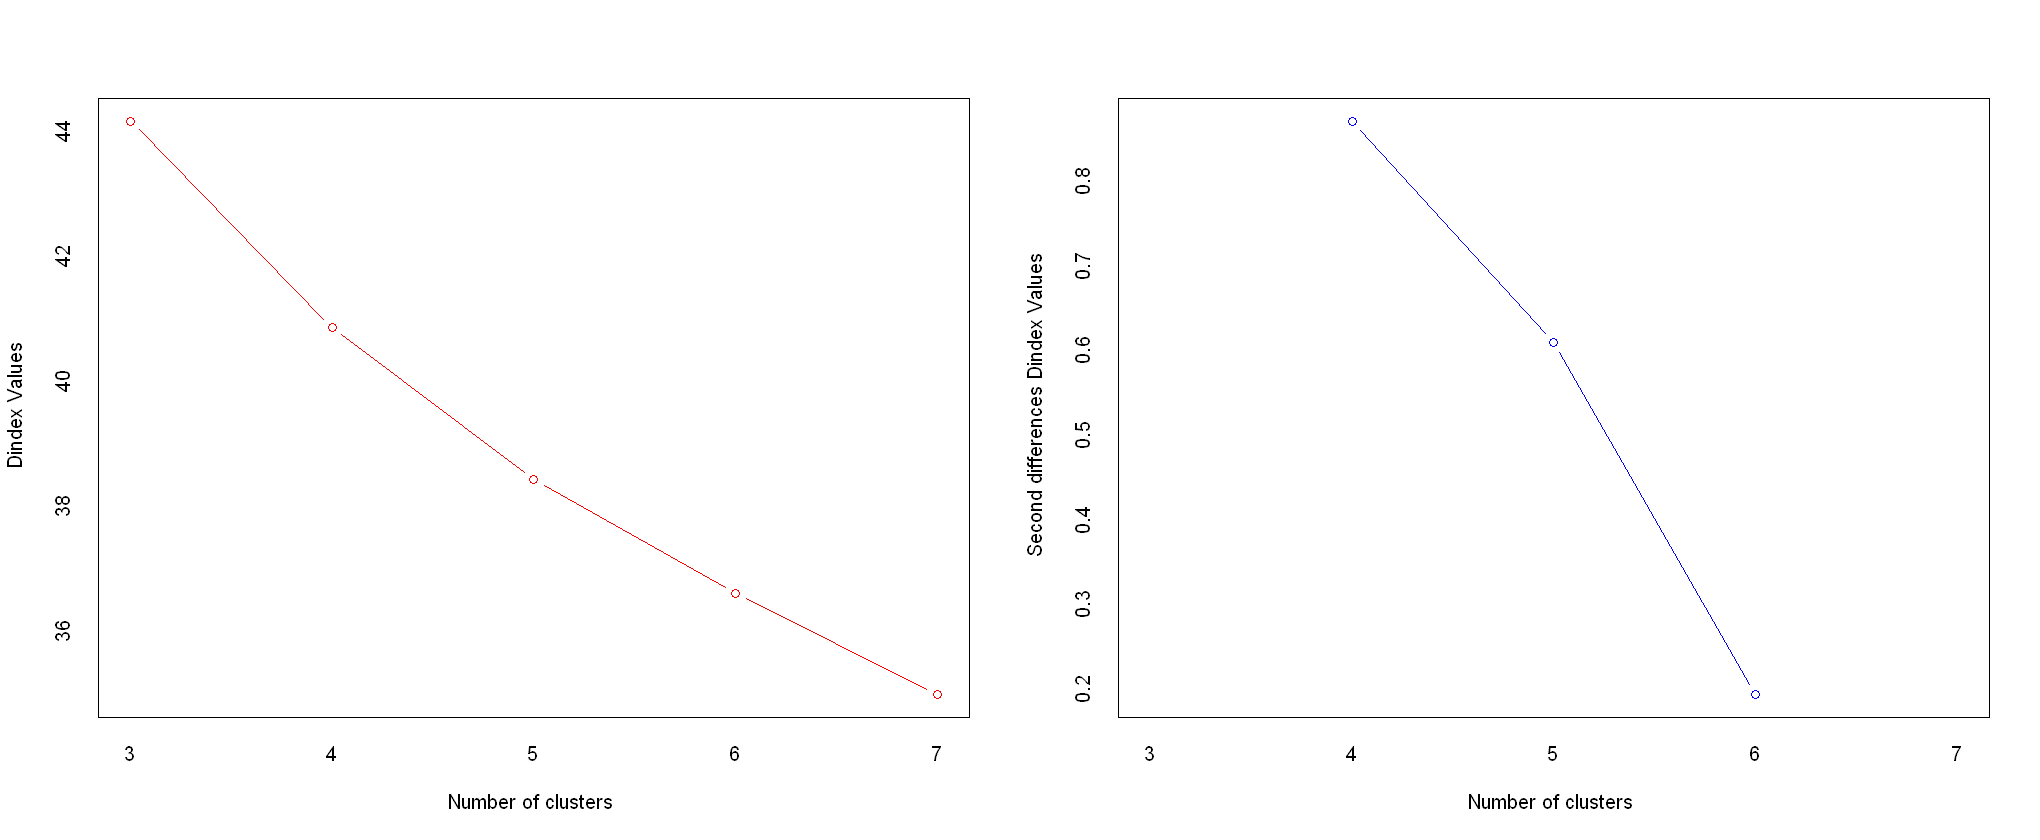

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


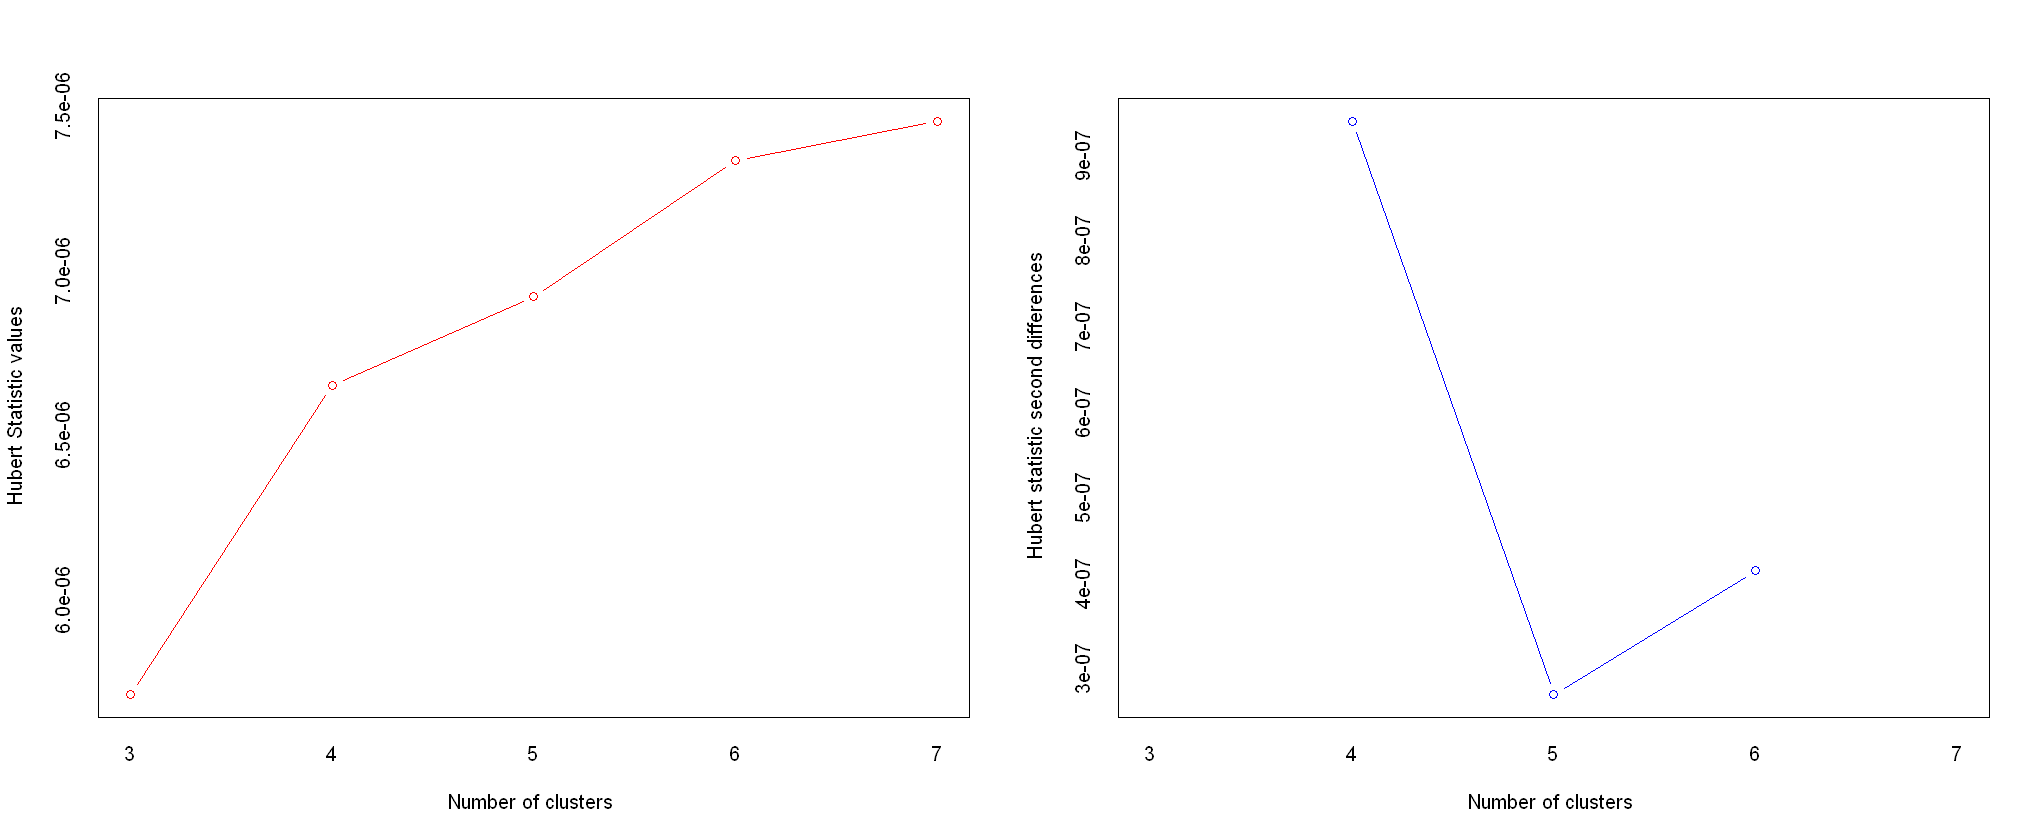

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 10 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 10 proposed 5 as the best number of clusters 
* 3 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


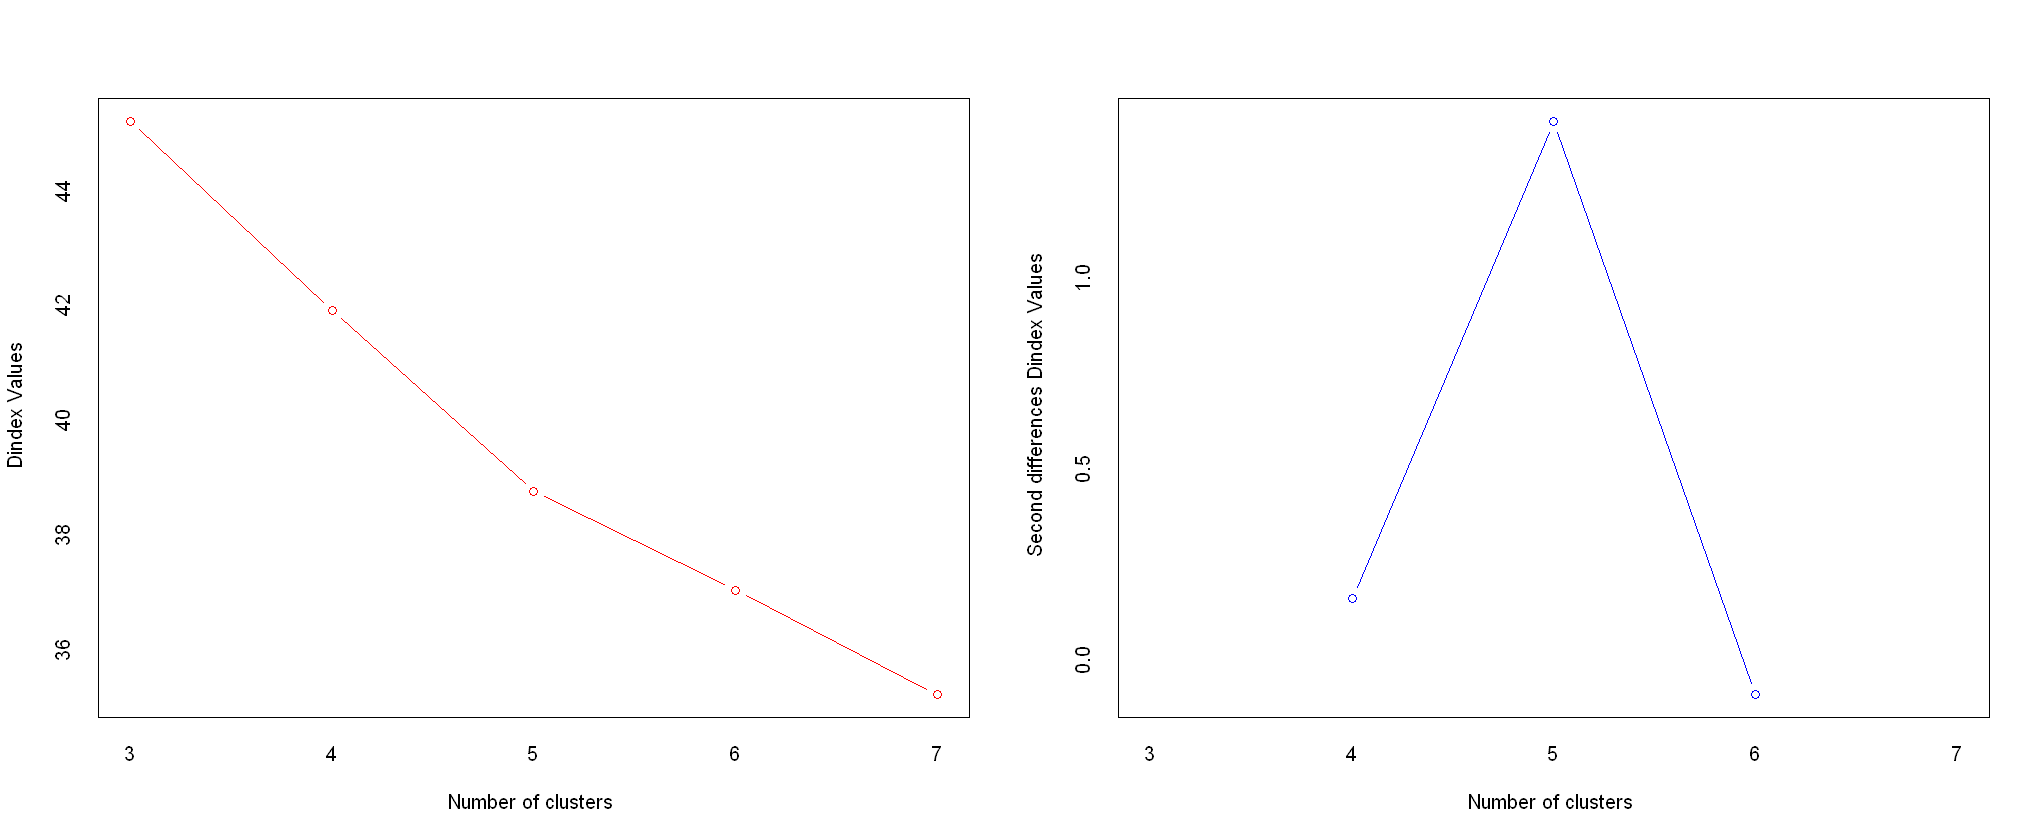

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


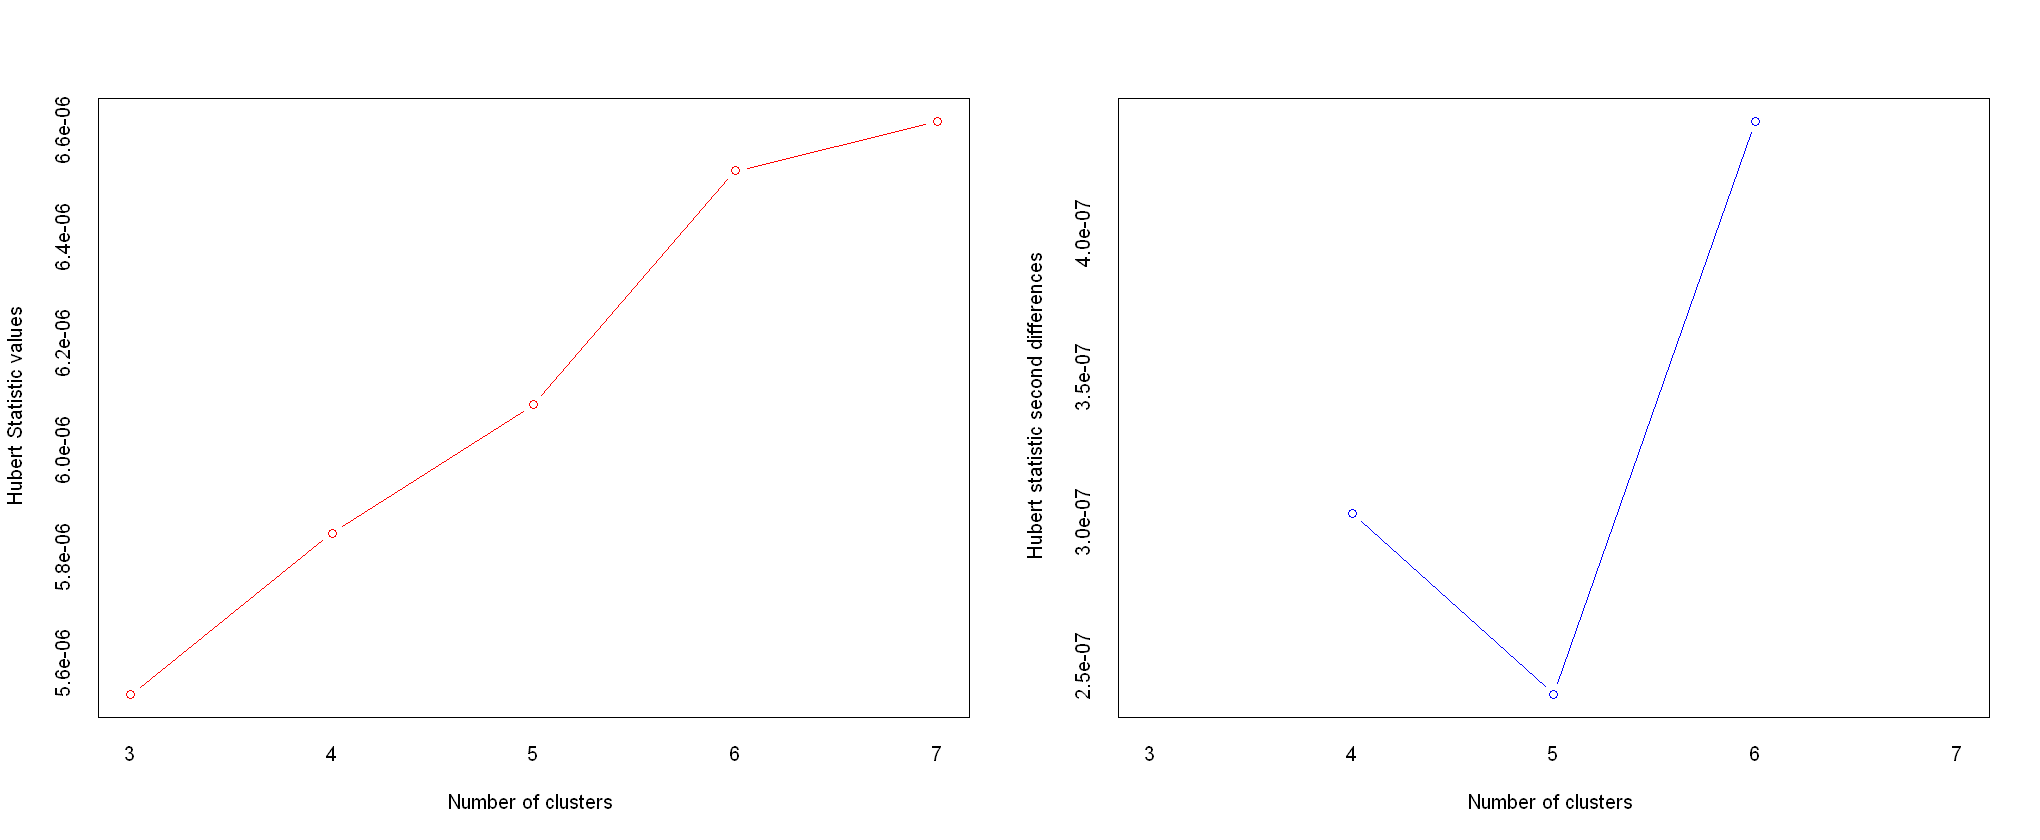

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 13 proposed 3 as the best number of clusters 
* 3 proposed 4 as the best number of clusters 
* 3 proposed 5 as the best number of clusters 
* 6 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


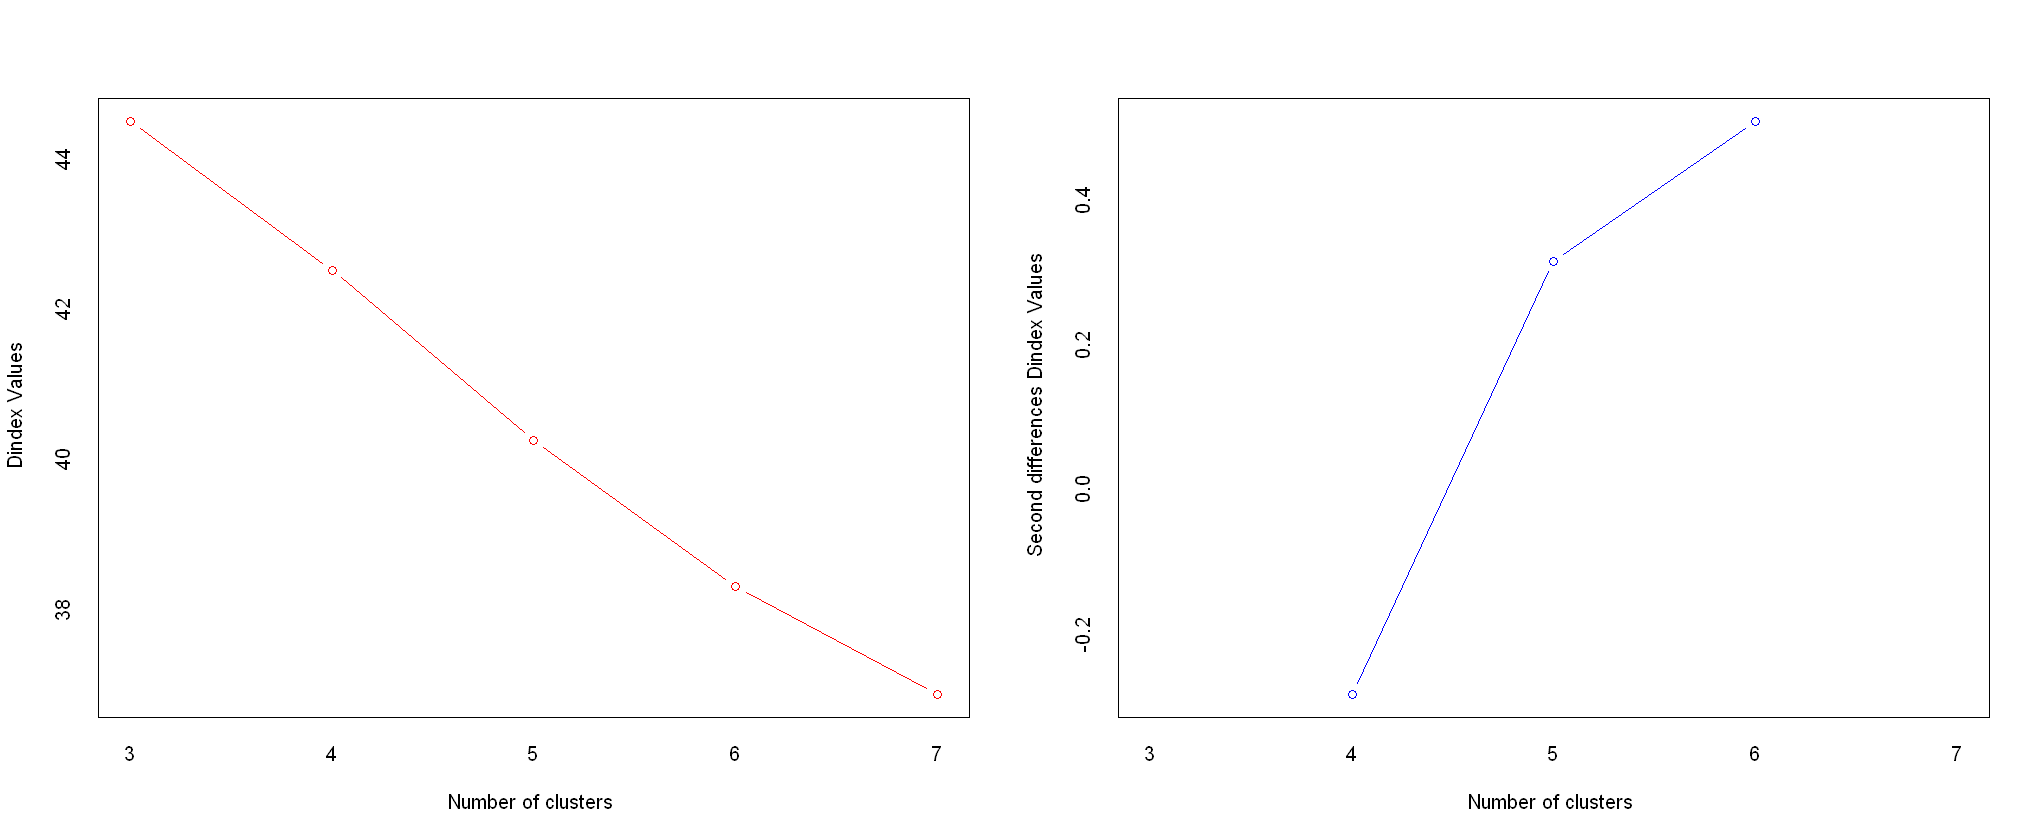

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


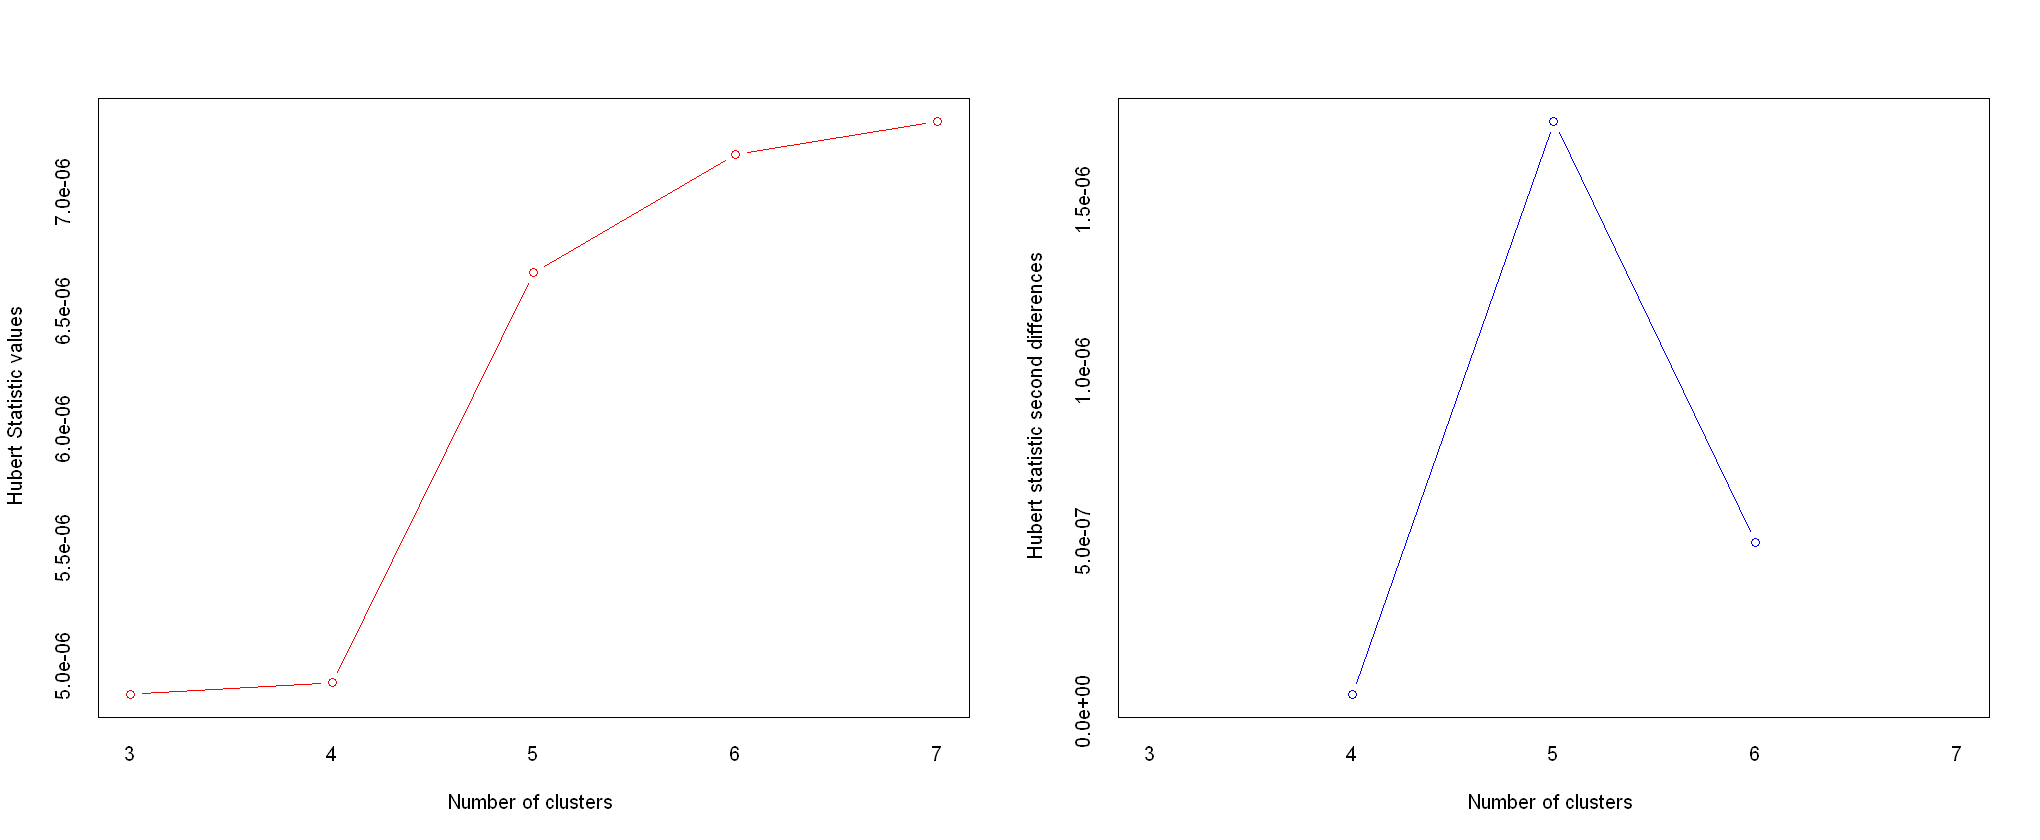

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 8 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 14 proposed 5 as the best number of clusters 
* 2 proposed 6 as the best number of clusters 
* 2 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  5 
 
 
******************************************************************* 


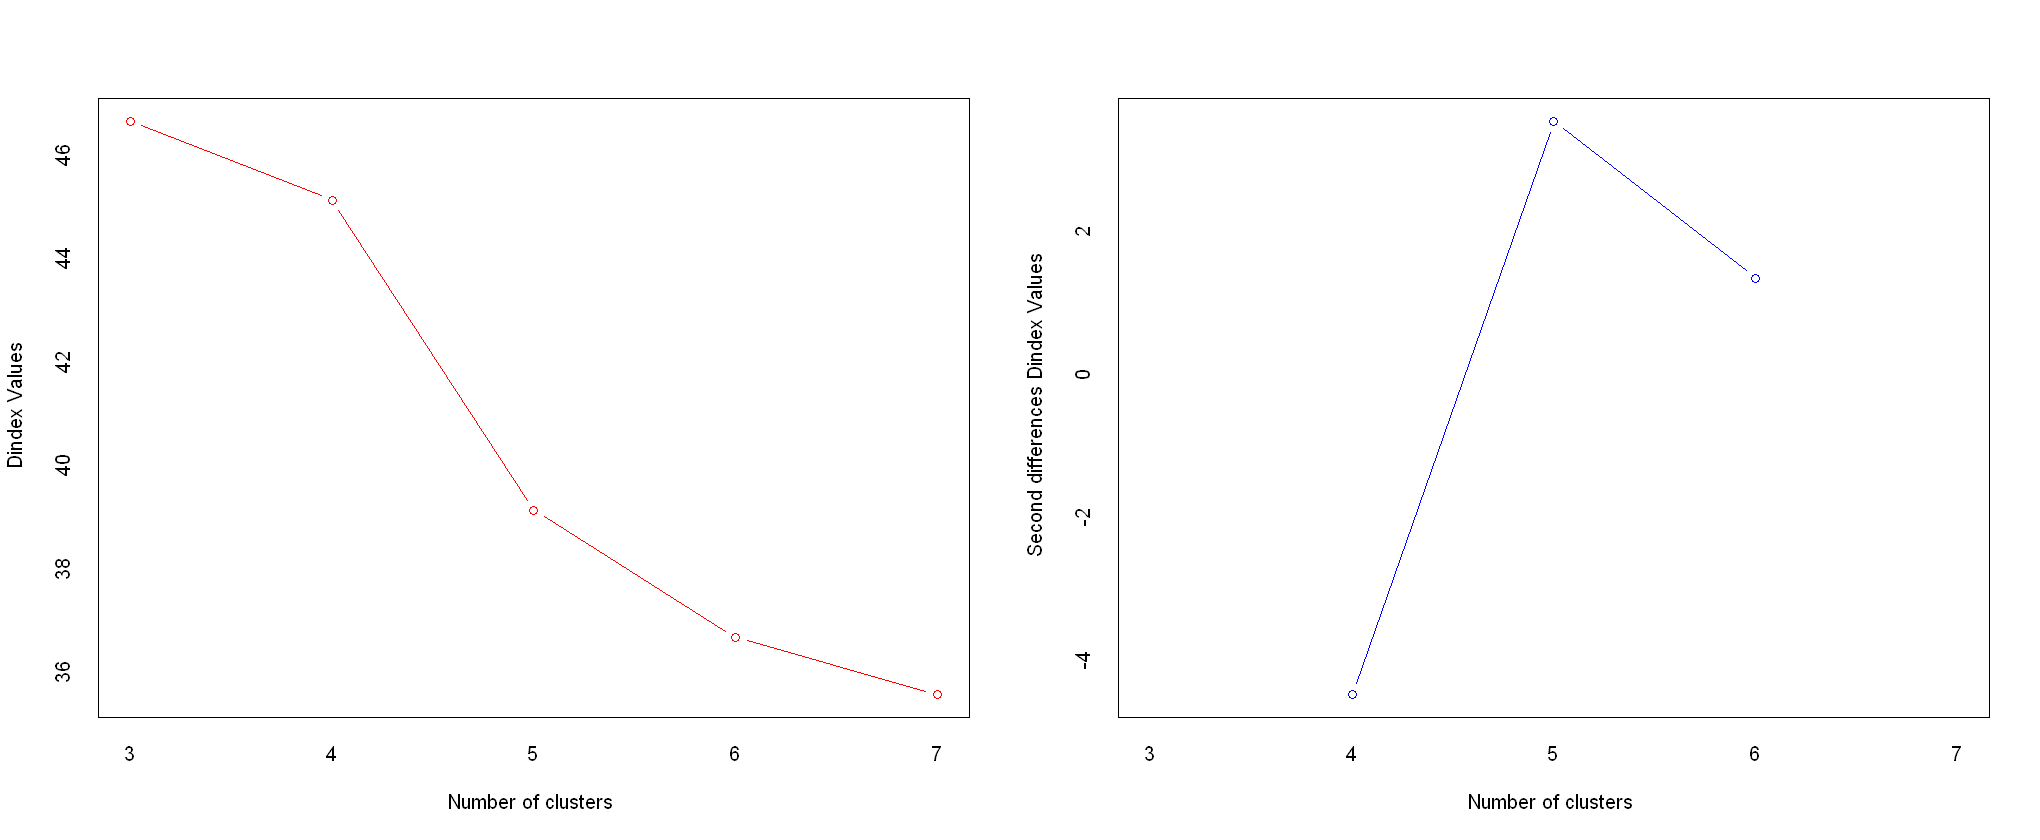

In [31]:
optimald2 = NbClust(data= df.wa, distance = "euclidean", min.nc = 3, max.nc = 7, method = "ward.D2", index = "alllong" ,alphaBeale = 0.1)
optimald = NbClust(data= df.wa, distance = "euclidean", min.nc = 3, max.nc = 7, method = "ward.D", index = 'alllong',alphaBeale = 0.1)
optimalcomplete = NbClust(data= df.wa, distance = "euclidean", min.nc = 3, max.nc = 7, method = "complete", index = 'alllong',alphaBeale = 0.1)
optimal.kmeans = NbClust(data= df.wa, distance = "euclidean", min.nc = 3, max.nc = 7, method = "kmeans", index = 'alllong',alphaBeale = 0.1)



Warning message in if (class(best_nc) == "numeric") print(best_nc) else if (class(best_nc) == :
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(best_nc) == "matrix") .viz_NbClust(x, print.summary, :
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(best_nc) == "numeric") print(best_nc) else if (class(best_nc) == :
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(best_nc) == "matrix") {:
"the condition has length > 1 and only the first element will be used"


Among all indices: 
* 2 proposed  0 as the best number of clusters
* 12 proposed  3 as the best number of clusters
* 7 proposed  4 as the best number of clusters
* 3 proposed  5 as the best number of clusters
* 3 proposed  7 as the best number of clusters
* 3 proposed  NA's as the best number of clusters

Conclusion
* According to the majority rule, the best number of clusters is  3 .



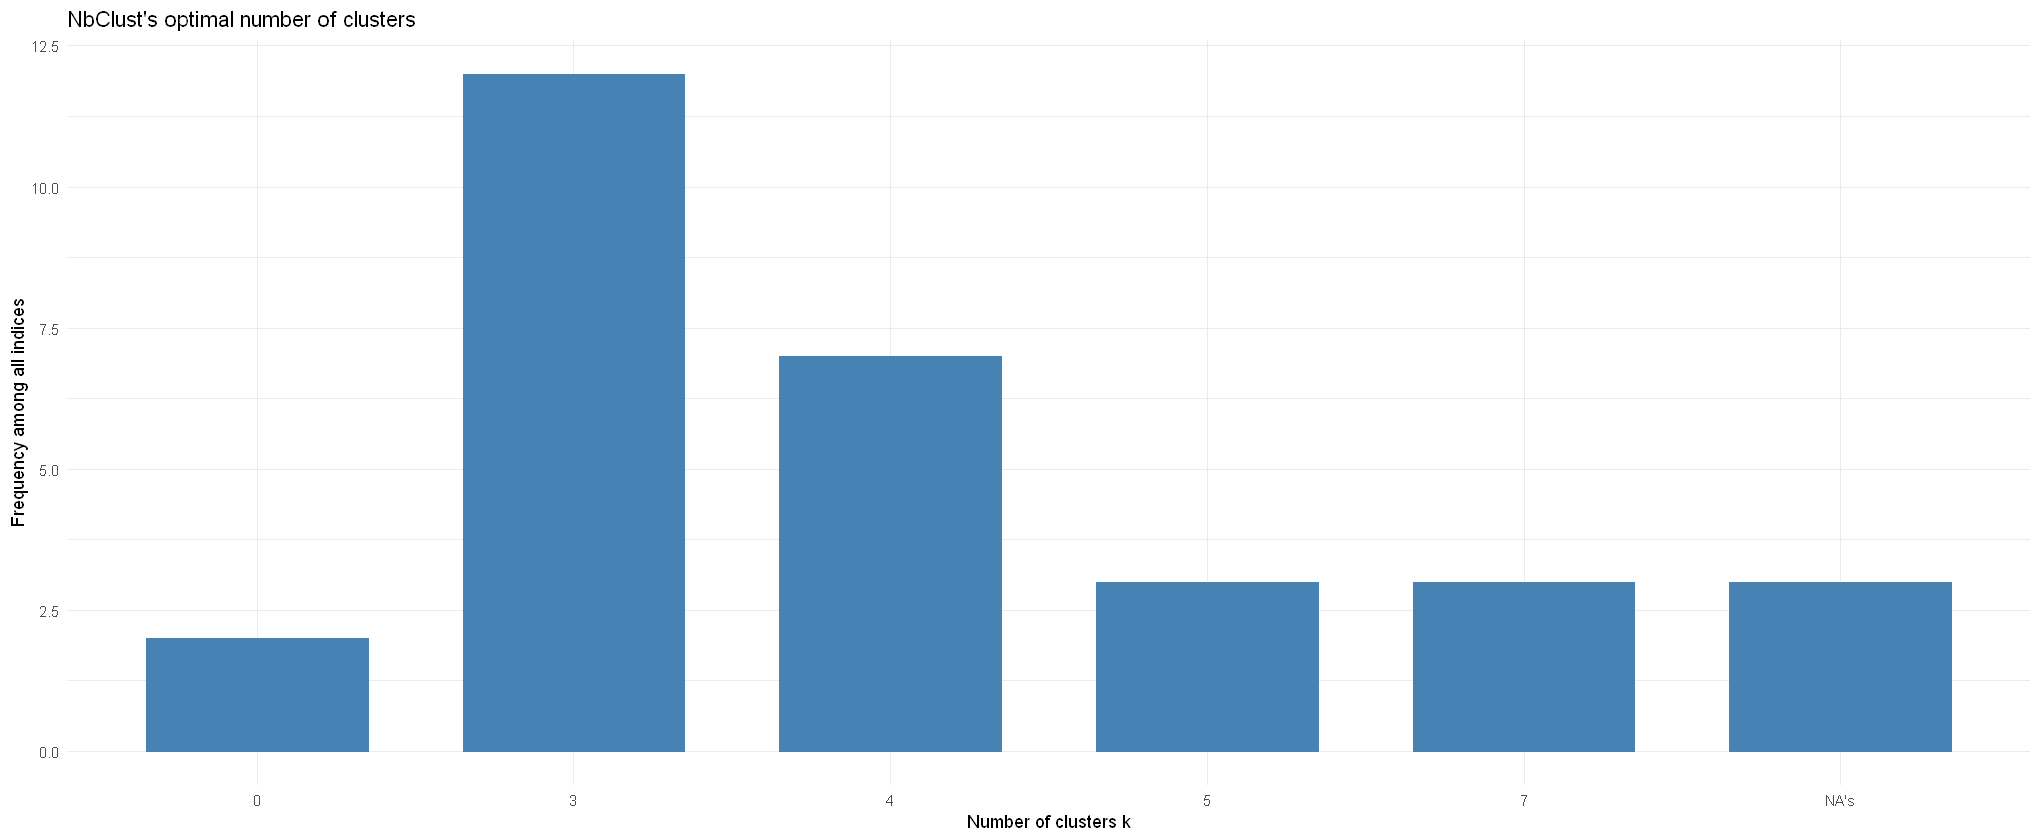

In [35]:
factoextra::fviz_nbclust(optimald2) + theme_minimal() + ggtitle("NbClust's optimal number of clusters")

List of the optimal index values of the NBClust function

In [18]:
list(optimald2$Best.nc)
list(optimald2$Best.nc[,c(1,2,12, 13, 17, 21, 24)])
#list(optimald$Best.nc)
#list(optimalcomplete$Best.nc)
#list(optimal.kmeans$Best.nc)




list(optimald2$All.index[,c(1,2,12, 13, 17, 21, 24)])
      
index.d2 <- optimald2$All.index[,c(1,12,13,17,21)]



,KL,CH,Hartigan,CCC,Scott,Marriot,TrCovW,TraceW,Friedman,Rubin,...,Ratkowsky,Ball,PtBiserial,Frey,McClain,Dunn,Hubert,SDindex,Dindex,SDbw
Number_clusters,3.0000,3.0000,5.0000,7.0000,4.0000,4.000000e+00,4,5.000,4.0000,5.0000,...,3.0000,4.00,3.000,4.0000,3.0000,3.0000,0,3.0000,0,7.0000
Value_Index,2.8739,53.6456,2.7899,11.5055,129.0177,3.043139e+71,54393392,6006.373,464.4234,-0.2728,...,0.2881,19670.53,0.692,1.2414,0.7291,0.2507,0,0.0433,0,0.3358


,KL,CH,DB,Silhouette,Ratkowsky,McClain,SDindex
Number_clusters,3.0000,3.0000,3.000,3.0000,3.0000,3.0000,3.0000
Value_Index,2.8739,53.6456,0.978,0.4093,0.2881,0.7291,0.0433


,KL,CH,DB,Silhouette,Ratkowsky,McClain,SDindex
3,2.8739,53.6456,0.9780,0.4093,0.2881,0.7291,0.0433
4,1.1109,43.8016,1.2870,0.3190,0.2764,1.0299,0.0615
5,1.5027,39.2728,1.5441,0.2353,0.2669,1.7494,0.0659
6,1.0150,35.4889,1.4059,0.2458,0.2547,1.9483,0.0622
7,0.9956,33.3522,1.2399,0.2565,0.2460,2.0589,0.0580


Dev of bar plot determing the best clustering result is 4 cuts.

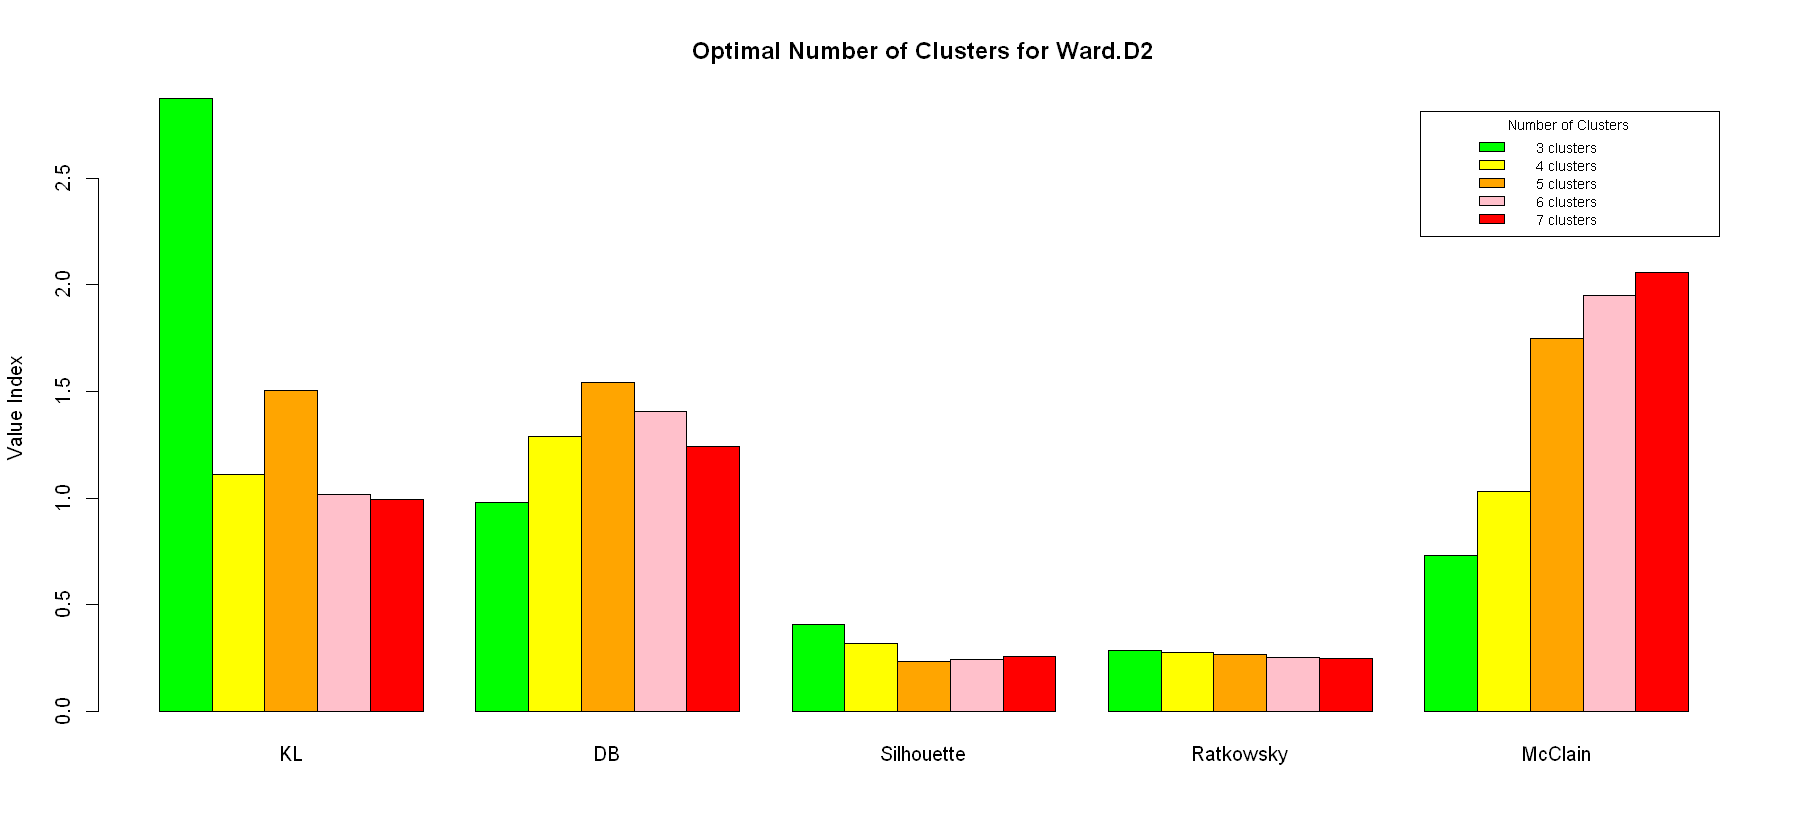

In [19]:
barplot(index.d2, beside = TRUE, main = "Optimal Number of Clusters for Ward.D2",
        col = c("green", "yellow", "orange","pink","red"),
        ylab = "Value Index", legend = c("3 clusters", "4 clusters", "5 clusters","6 clusters","7 clusters"), 
        args.legend = list(title = "Number of Clusters", cex = .7))

Cutting at different tree levels 4 which is the optimal for Ward.D2

In [20]:
clusters_wa <- cutree(hc.ward2,3)     
dfsimple$clusters <- cutree(hc.ward2,3)
head(dfsimple)
write_xlsx(dfsimple , 'C:/Users/hichul/Desktop/2020-2021/Fall of 2020/Independent Study/water-accessibility/results/dfsimple.xlsx')

Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc,clusters
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,20.1,18.5,4.7,...,45.3,45.2,8.2,30.0,5.8,35.2,11.8,0.0,0.1,1
Albania,2018,DHS,98.4,48.8,5.2,2.4,1.4,4.1,2.5,...,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1,2
Angola,2016,DHS,66.9,4.3,9.7,10.3,1.9,9.1,3.3,...,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3,1
Armenia,2016,DHS,99.9,88.3,8.0,0.5,0.2,0.2,1.0,...,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1,2
Azerbaijan,2006,DHS,90.6,34.0,19.7,3.5,9.3,6.2,7.5,...,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,0.0,2
Bangladesh,2014,DHS,97.8,4.3,3.3,2.7,86.4,0.2,0.0,...,75.5,22.7,1.6,25.1,0.0,6.4,0.8,0.0,0.3,2


# Fancy Clustering Graph Majority 

cluster,n
<int>,<int>
1,38
2,33
3,7


[[1]]
 [1] "Afghanistan"               "Angola"                   
 [3] "Benin"                     "Burkina Faso"             
 [5] "Burundi"                   "Cameroon"                 
 [7] "Central African Republic"  "Chad"                     
 [9] "Congo"                     "Congo Democratic Republic"
[11] "Cote d'Ivoire"             "Eritrea"                  
[13] "Eswatini"                  "Ethiopia"                 
[15] "Gambia"                    "Ghana"                    
[17] "Guinea"                    "Haiti"                    
[19] "Kenya"                     "Lesotho"                  
[21] "Liberia"                   "Madagascar"               
[23] "Malawi"                    "Mali"                     
[25] "Mauritania"                "Mozambique"               
[27] "Myanmar"                   "Niger"                    
[29] "Nigeria"                   "Papua New Guinea"         
[31] "Rwanda"                    "Sao Tome and Principe"    
[33] "Sierra Leone"              "Tanzania"                 
[35] "Togo"                      "Uganda"                   
[37] "Zambia"                    "Zimbabwe"                 

[[2]]
 [1] "Albania"            "Armenia"            "Azerbaijan"        
 [4] "Bangladesh"         "Bolivia"            "Colombia"          
 [7] "Comoros"            "Dominican Republic" "Egypt"             
[10] "Gabon"              "Guatemala"          "Guyana"            
[13] "Honduras"           "India"              "Indonesia"         
[16] "Jordan"             "Kazakhstan"         "Kyrgyz Republic"   
[19] "Maldives"           "Namibia"            "Nepal"             
[22] "Nicaragua"          "Pakistan"           "Peru"              
[25] "Philippines"        "Senegal"            "South Africa"      
[28] "Tajikistan"         "Timor-Leste"        "Turkey"            
[31] "Turkmenistan"       "Uzbekistan"         "Yemen"             

[[3]]
[1] "Brazil"   "Cambodia" "Moldova"  "Morocco"  "Paraguay" "Ukraine"  "Vietnam"

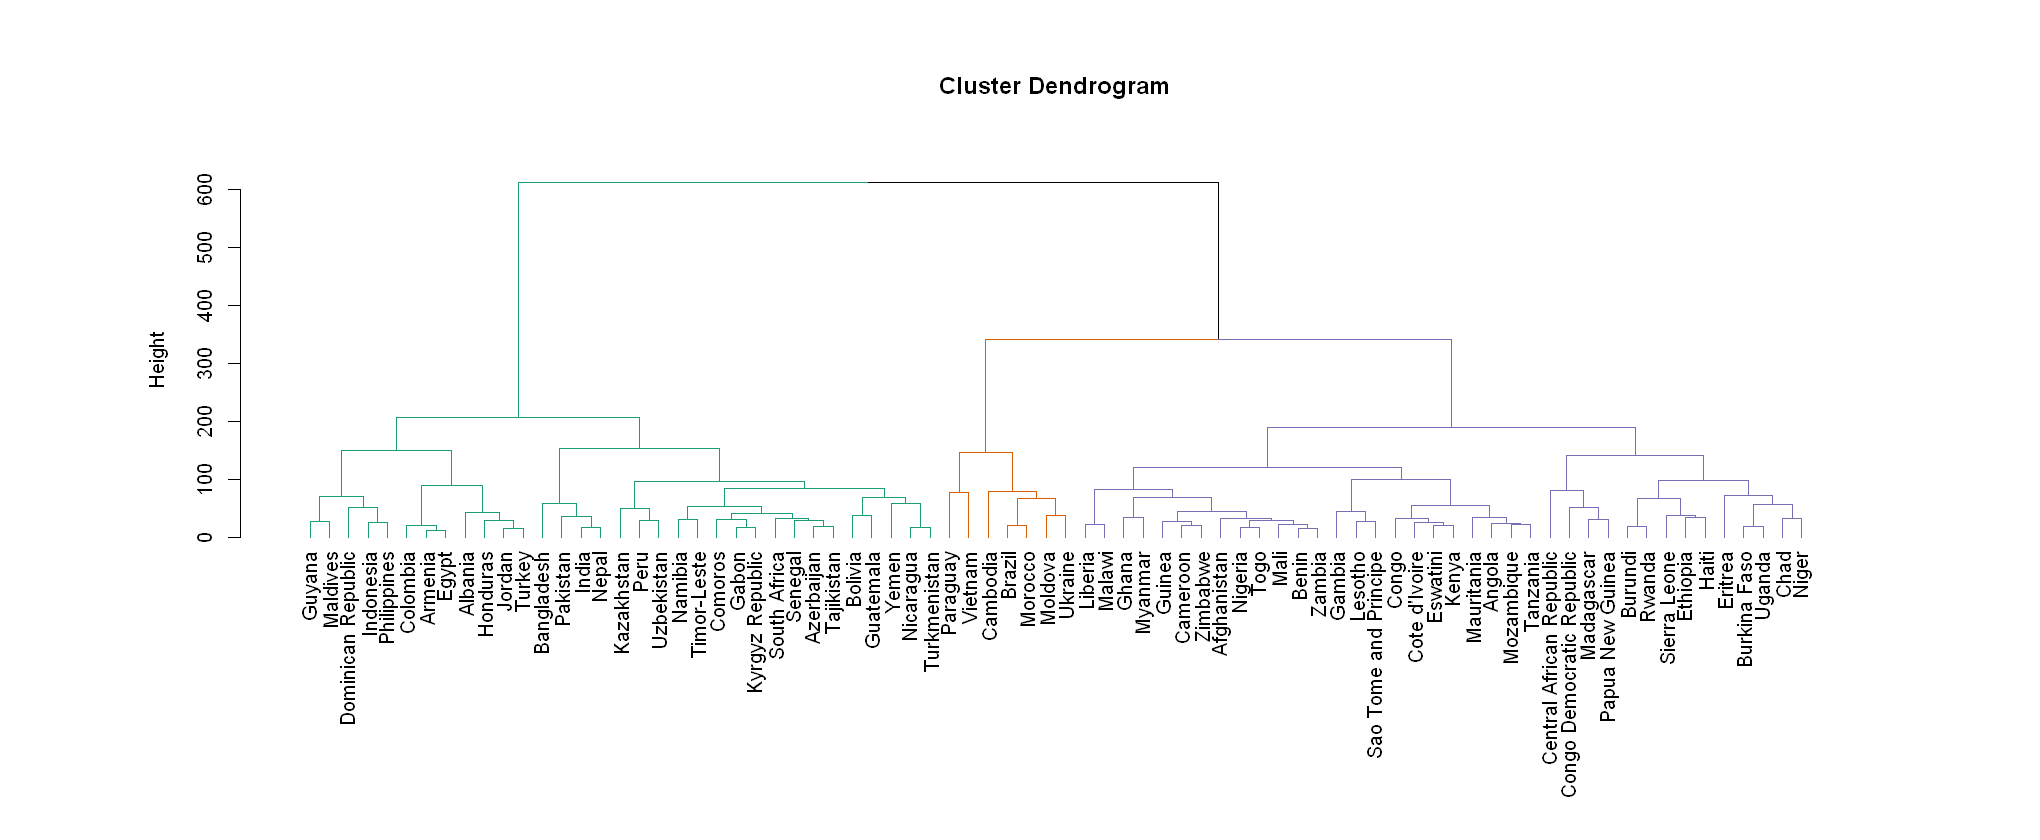

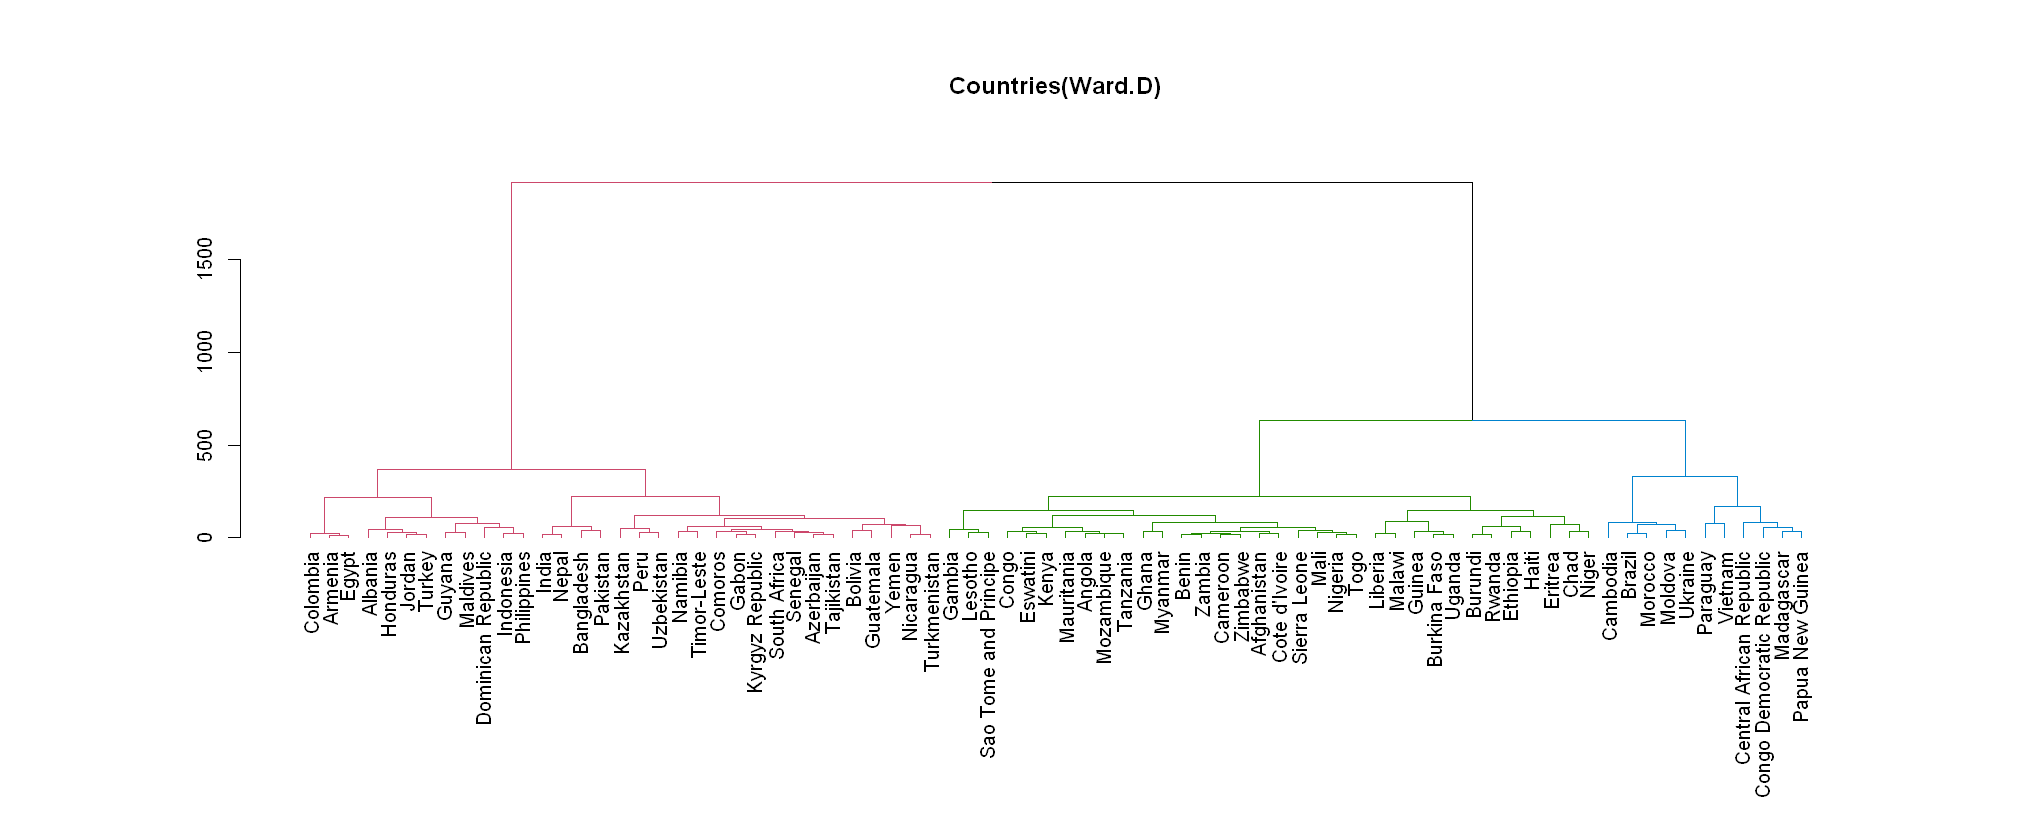

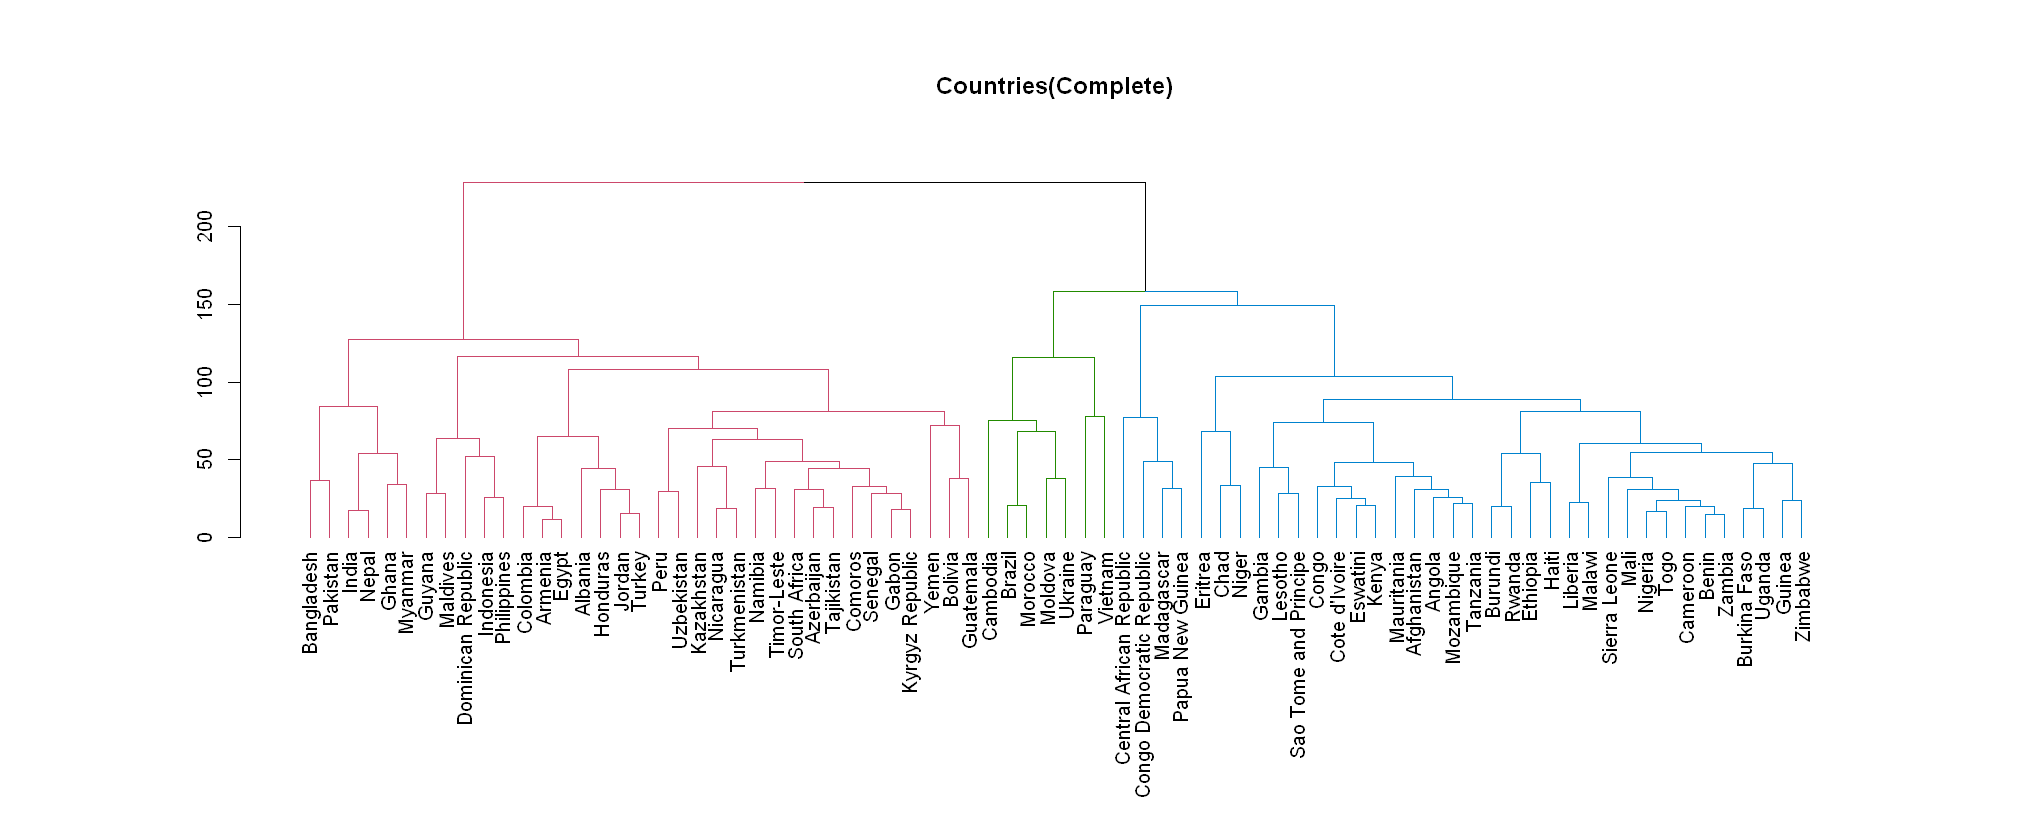

In [21]:
dend <- as.dendrogram(hc.ward2 )
dend <- color_branches(dend, k=3, col = c("#1b9e77","#d95f02","#7570b3"))
labels(dend) <- dfsimple$Country[hc.ward2$order]
options(repr.plot.width=17, repr.plot.height=7)
par(mar = c(12,10,7,7))
par(cex=1)
plot(dend, main="Cluster Dendrogram", xlab="", 
     ylab="Height",horiz=FALSE )


df.wa.d2.avg <- mutate(df.wa, cluster = clusters_wa)
count(df.wa.d2.avg, cluster)

sapply(unique(clusters_wa),function(g)dfsimple$Country[clusters_wa == g])

dend <- as.dendrogram(hc.ward)
dend <- color_branches(dend, k=3)
labels(dend) <- dfsimple$Country[hc.ward$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries(Ward.D)", xlab="", 
     ylab="", cex=.5,  )

dend <- as.dendrogram(hc.complete)
dend <- color_branches(dend, k=3)
labels(dend) <- dfsimple$Country[hc.complete$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries(Complete)", xlab="", 
     ylab="", cex=.5,  )
   


# K-Mean Clustering in R

List of 9
 $ cluster     : int [1:78] 1 2 1 2 2 2 1 2 1 1 ...
 $ centers     : num [1:2, 1:22] 14.68 7.76 15.01 9.25 4.17 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:22] "ptap" "bore" "pspr" "uspr" ...
 $ totss       : num 417836
 $ withinss    : num [1:2] 153053 77166
 $ tot.withinss: num 230219
 $ betweenss   : num 187618
 $ size        : int [1:2] 45 33
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


K-means clustering with 2 clusters of sizes 45, 33

Cluster means:
       ptap      bore     pspr      uspr     pwel      uwel     surw     tles
1 14.684444 15.008889 4.173333 5.6088889 9.433333 10.042222 6.922222 44.39778
2  7.760606  9.245455 1.703030 0.9545455 2.060606  2.427273 2.672727 16.41818
       tmor     rain      phom     imws      pipy     truc      ctan      bott
1 14.168889 2.040000  9.135556 70.97778  8.486667 0.900000 0.5155556  1.291111
2  2.769697 3.290909 33.460606 89.81818 14.506061 2.139394 0.5060606 13.209091
      uiws      othw     iwsp     basw     liws     watp
1 26.76222 0.3600000 22.11333 51.92444 7.902222 24.70667
2 10.09091 0.6121212 76.12424 87.60606 1.678788 80.09091

Clustering vector:
 [1] 1 2 1 2 2 2 1 2 1 1 1 1 1 1 1 2 2 1 1 1 2 2 1 1 1 2 1 1 2 1 2 1 2 2 2 2 2 1
[39] 2 1 1 1 1 2 1 1 1 1 1 1 2 2 2 1 1 2 1 1 2 2 1 1 2 1 2 2 1 2 1 2 2 1 1 2 1 2
[77] 1 1

Within cluster sum of squares by cluster:
[1] 153053.04  77165.62
 (between_SS / total_SS =  44.9 %

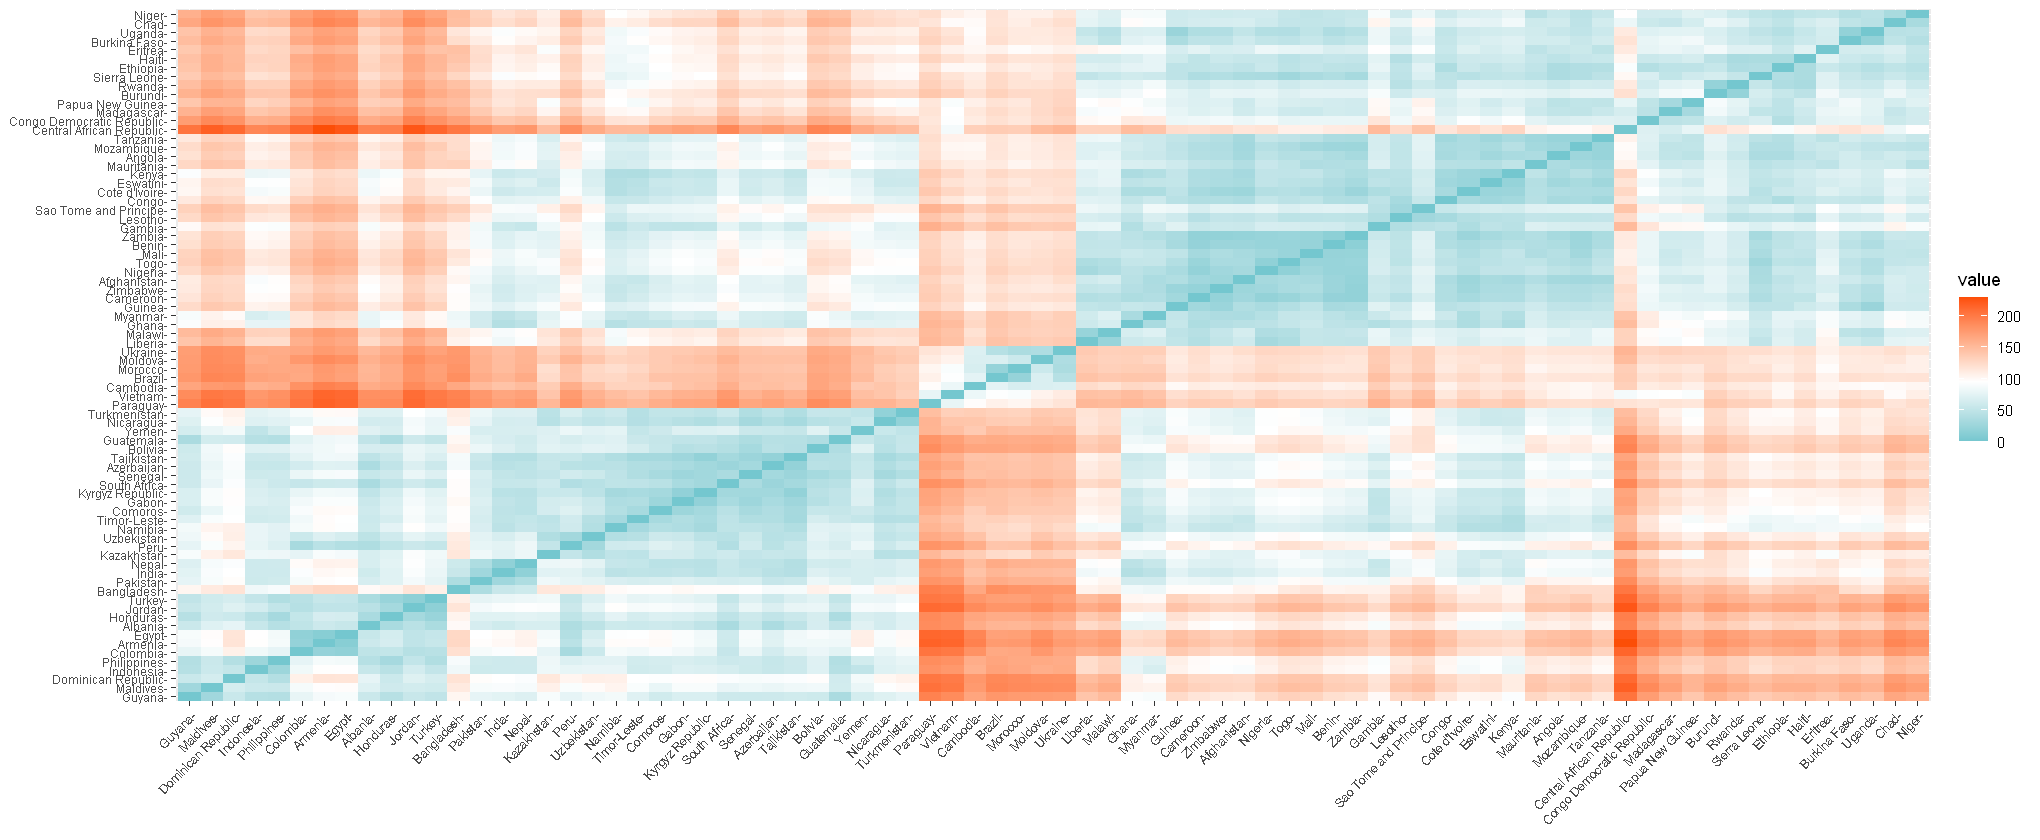

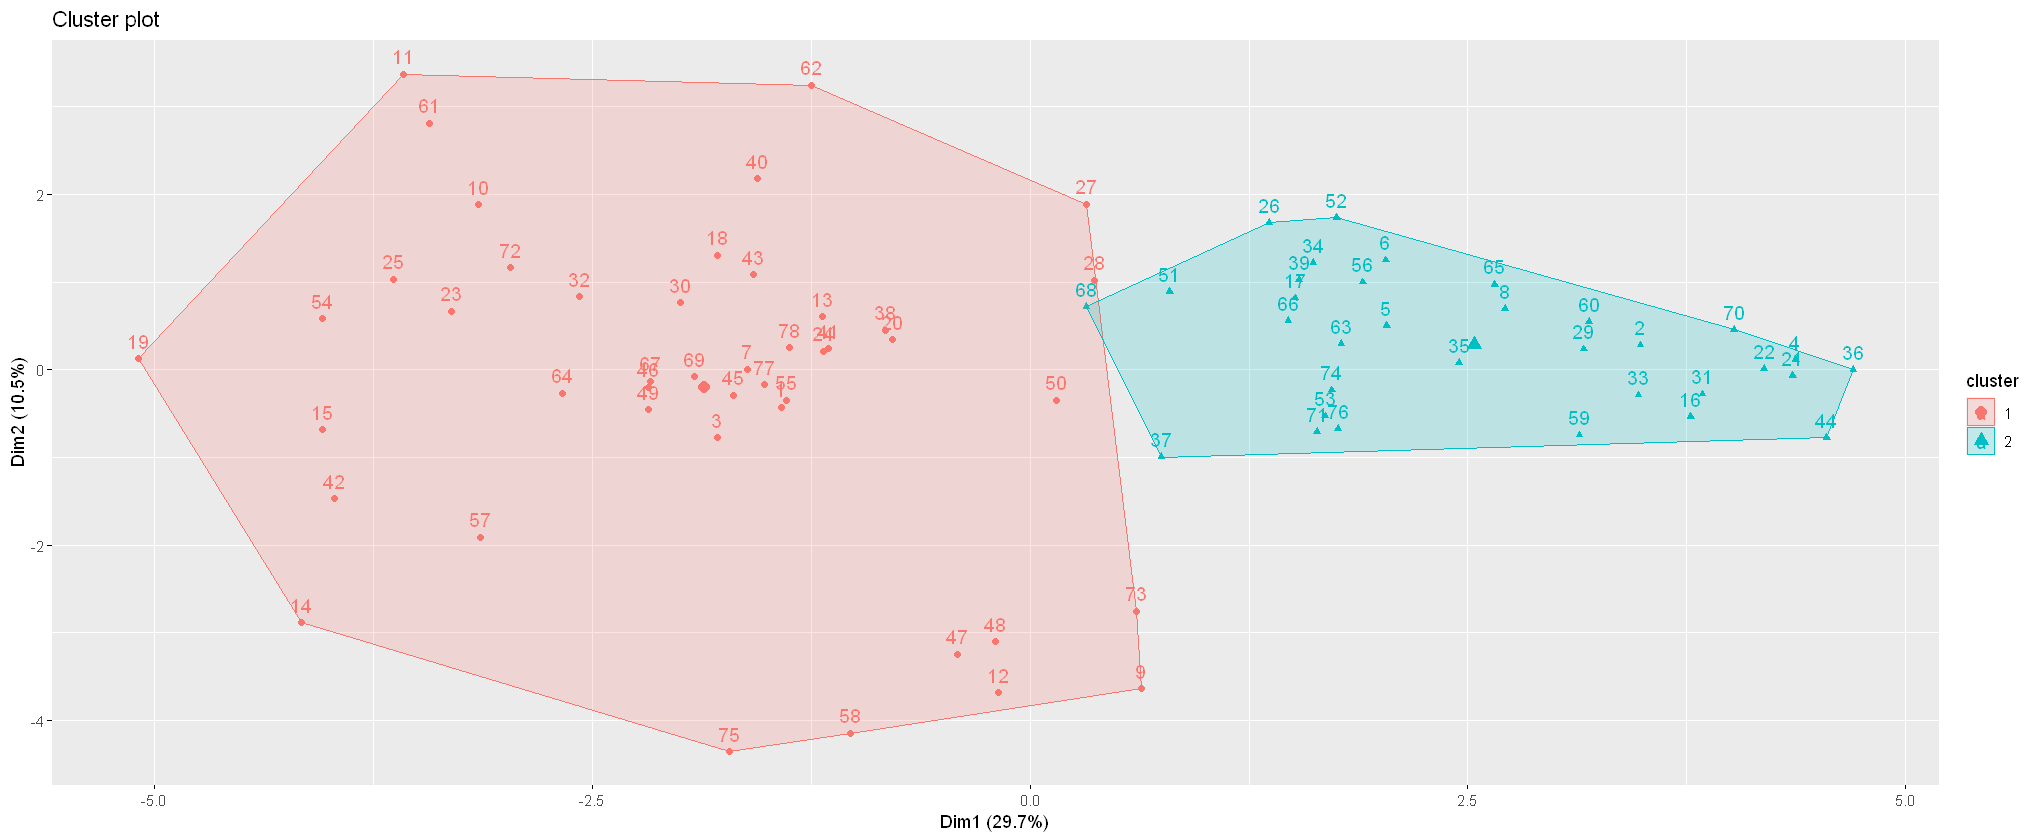

List of 9
 $ cluster     : int [1:78] 1 3 1 3 2 2 1 2 4 1 ...
 $ centers     : num [1:4, 1:22] 16.97 13.14 1.26 2.34 16.88 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "1" "2" "3" "4"
  .. ..$ : chr [1:22] "ptap" "bore" "pspr" "uspr" ...
 $ totss       : num 417836
 $ withinss    : num [1:4] 65058 37850 25397 20223
 $ tot.withinss: num 148529
 $ betweenss   : num 269307
 $ size        : int [1:4] 35 22 14 7
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


K-means clustering with 4 clusters of sizes 35, 22, 14, 7

Cluster means:
       ptap      bore      pspr      uspr      pwel       uwel     surw
1 16.965714 16.880000 5.1800000 7.1028571  8.925714 11.6828571 8.125714
2 13.136364 14.731818 1.4500000 1.1772727  3.340909  4.0500000 3.450000
3  1.264286  2.664286 1.9357143 0.5785714  2.021429  0.6642857 1.692857
4  2.342857  4.042857 0.5285714 0.1857143 11.185714  3.5285714 2.242857
       tles      tmor     rain      phom     imws      pipy     truc      ctan
1 53.108571 17.840000 1.134286  5.168571 70.28857  8.291429 1.031429 0.5514286
2 25.204545  4.245455 1.190909 22.904545 86.25455 19.881818 2.277273 0.4363636
3  9.028571  0.800000 6.114286 43.464286 95.20714  6.364286 1.578571 0.5785714
4  0.000000  0.000000 6.985714 31.714286 66.77143  6.271429 0.400000 0.4142857
       bott      uiws      othw     iwsp     basw      liws     watp
1  0.600000 29.674286 0.3457143 24.47714 59.50286 9.8514286 27.60571
2  2.331818 13.604545 0.5818182 6

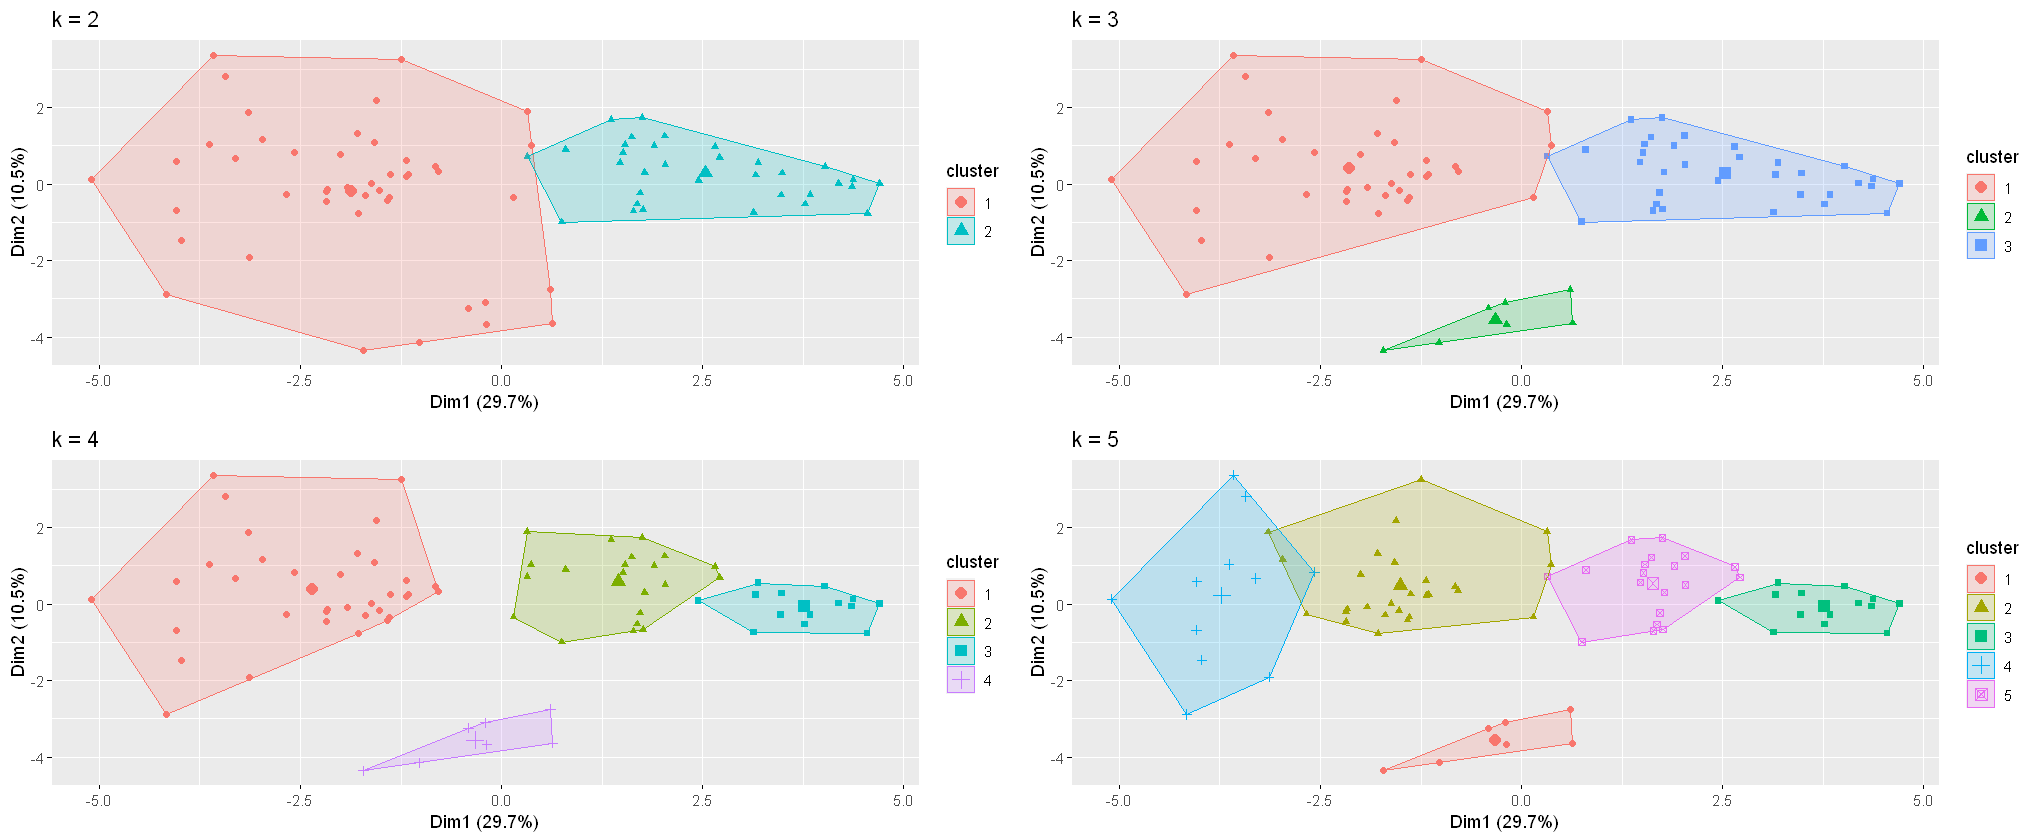

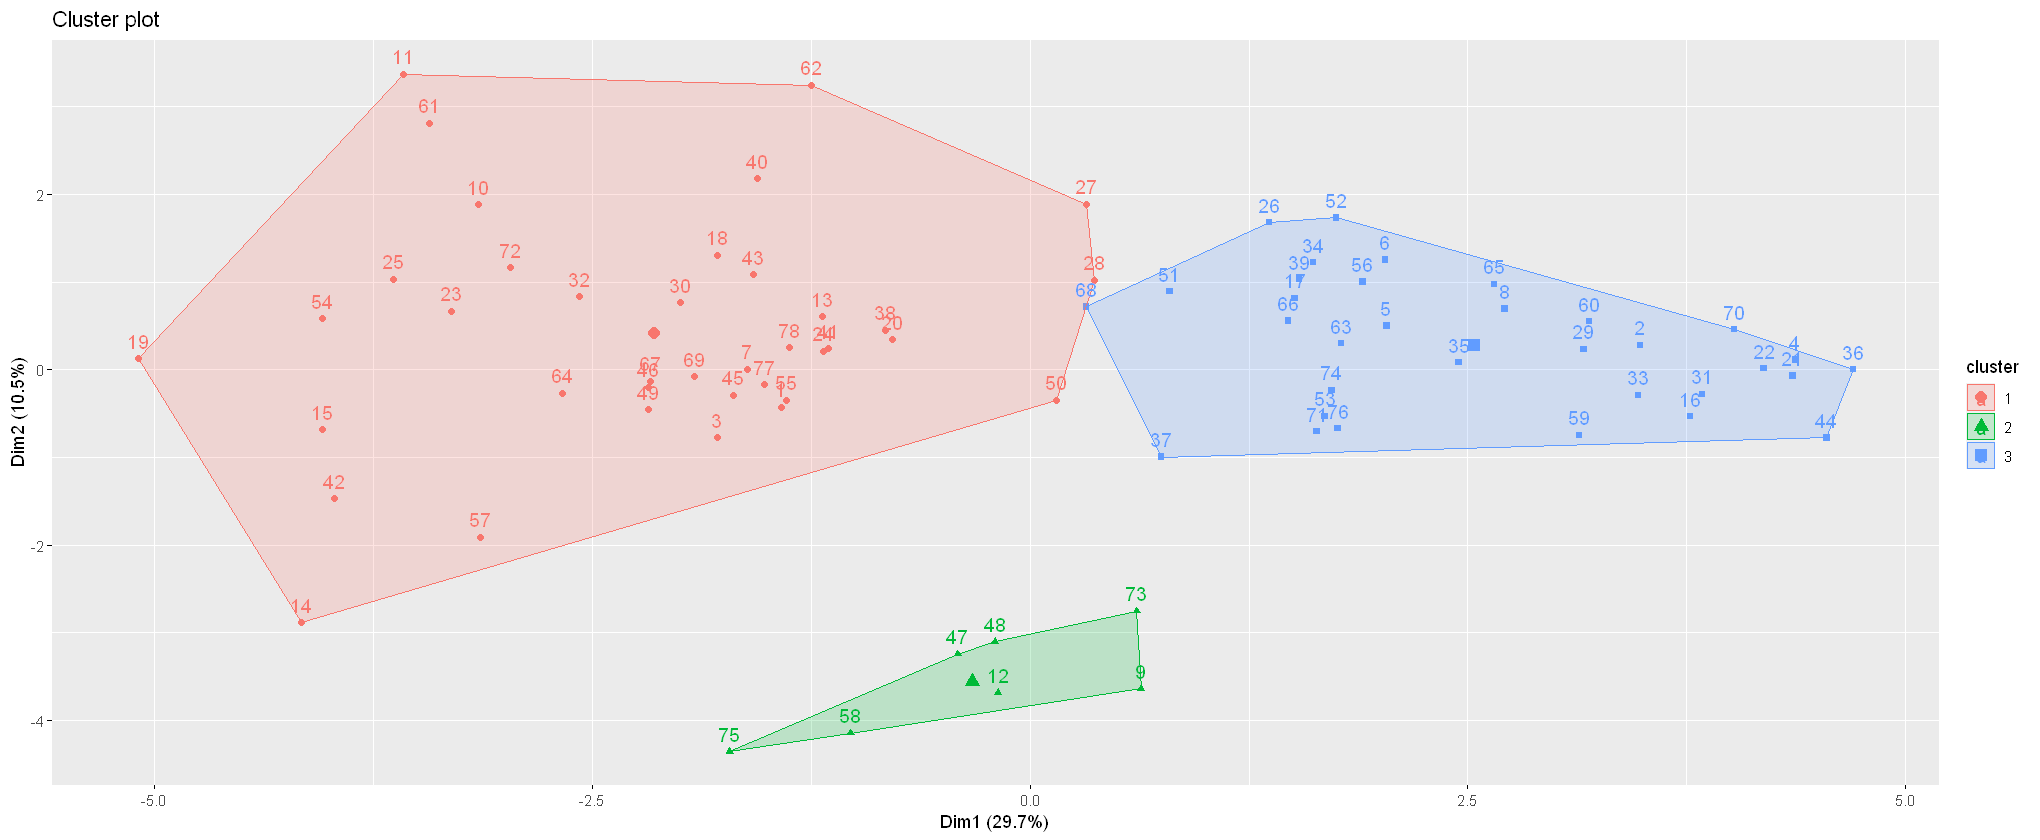

In [22]:
distance <- get_dist(df.wa)
labels(distance) <- dfsimple$Country
fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high="#FC4E07"), lab_size = 7 )
k2 <- kmeans(df.wa, centers = 2, nstart = 25)
str(k2)
k2
fviz_cluster(k2, data = df.wa ,  )
# it is often advantageous to use several different values of k and examine the differences in the results.
# We can execute the same process for 3, 4, and 5 clusters, and the results are shown in the figure:
k3 <- kmeans(df.wa, centers = 3, nstart = 25)
k4 <- kmeans(df.wa, centers = 4, nstart = 25)
k5 <- kmeans(df.wa, centers = 5, nstart = 25)

# plots to compare
p1 <- fviz_cluster(k2, geom = "point", data = df.wa) + ggtitle("k = 2")
p2 <- fviz_cluster(k3, geom = "point",  data = df.wa) + ggtitle("k = 3")
p3 <- fviz_cluster(k4, geom = "point",  data = df.wa) + ggtitle("k = 4")
p4 <- fviz_cluster(k5, geom = "point",  data = df.wa) + ggtitle("k = 5")
grid.arrange(p1, p2, p3, p4, nrow = 2)
str(k4)
k4
fviz_cluster(k3, data = df.wa , )

# Gap Stat Method

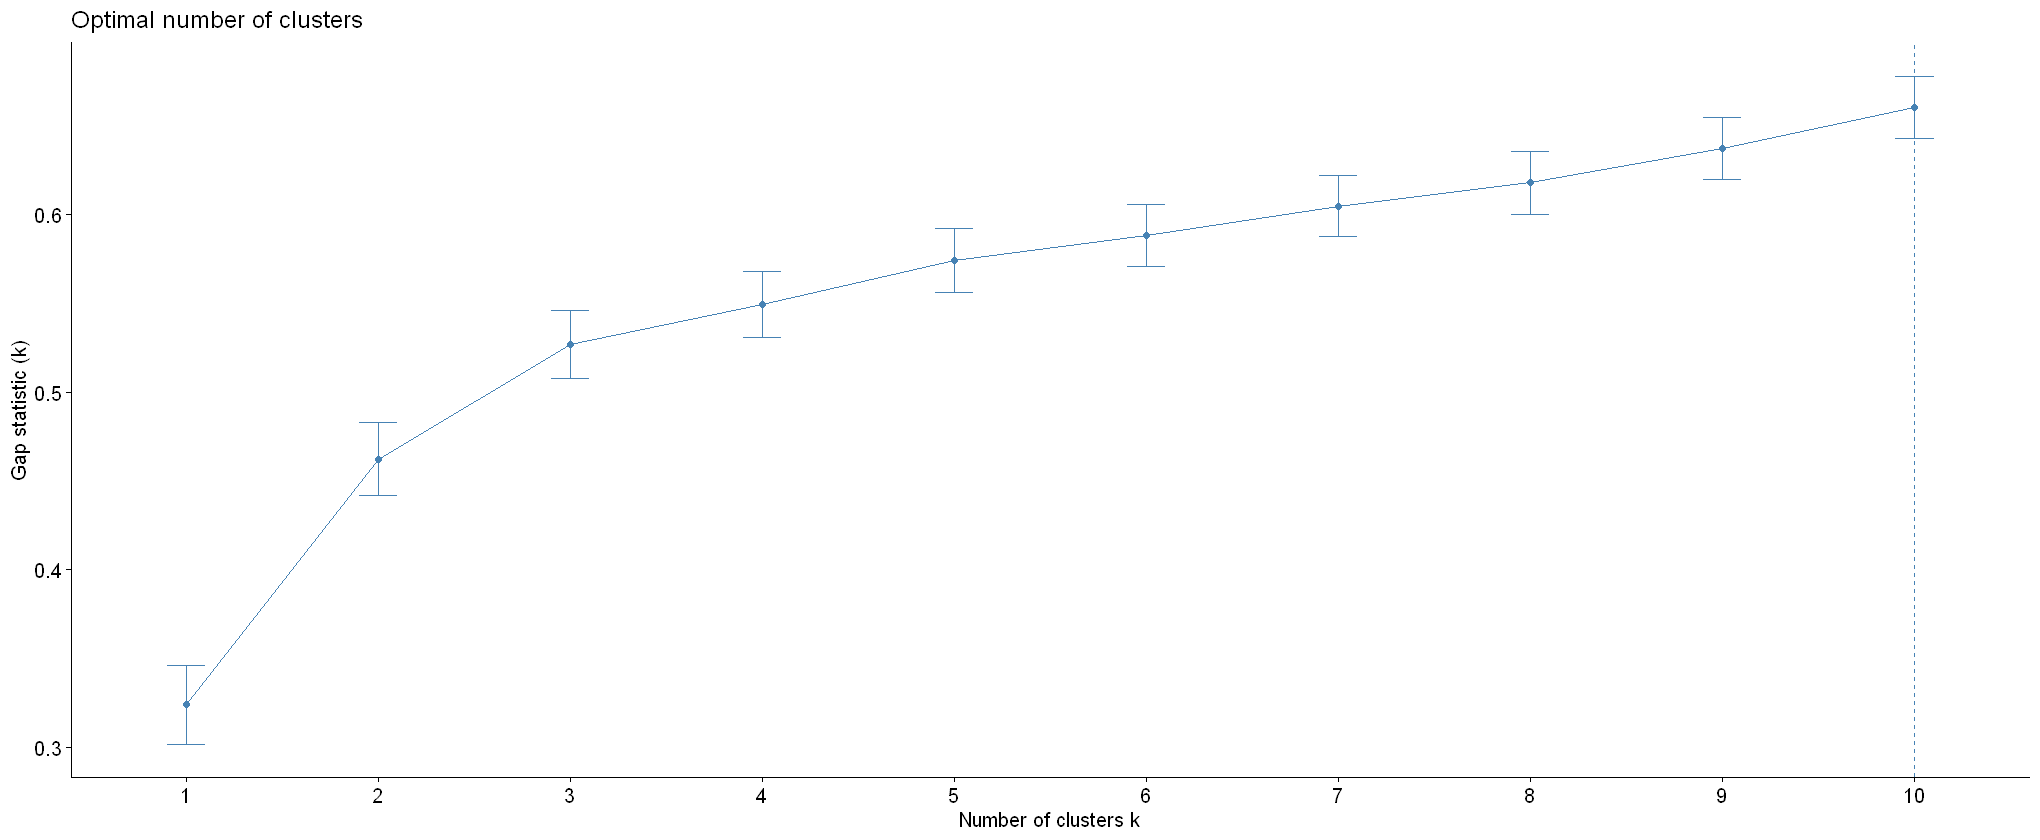

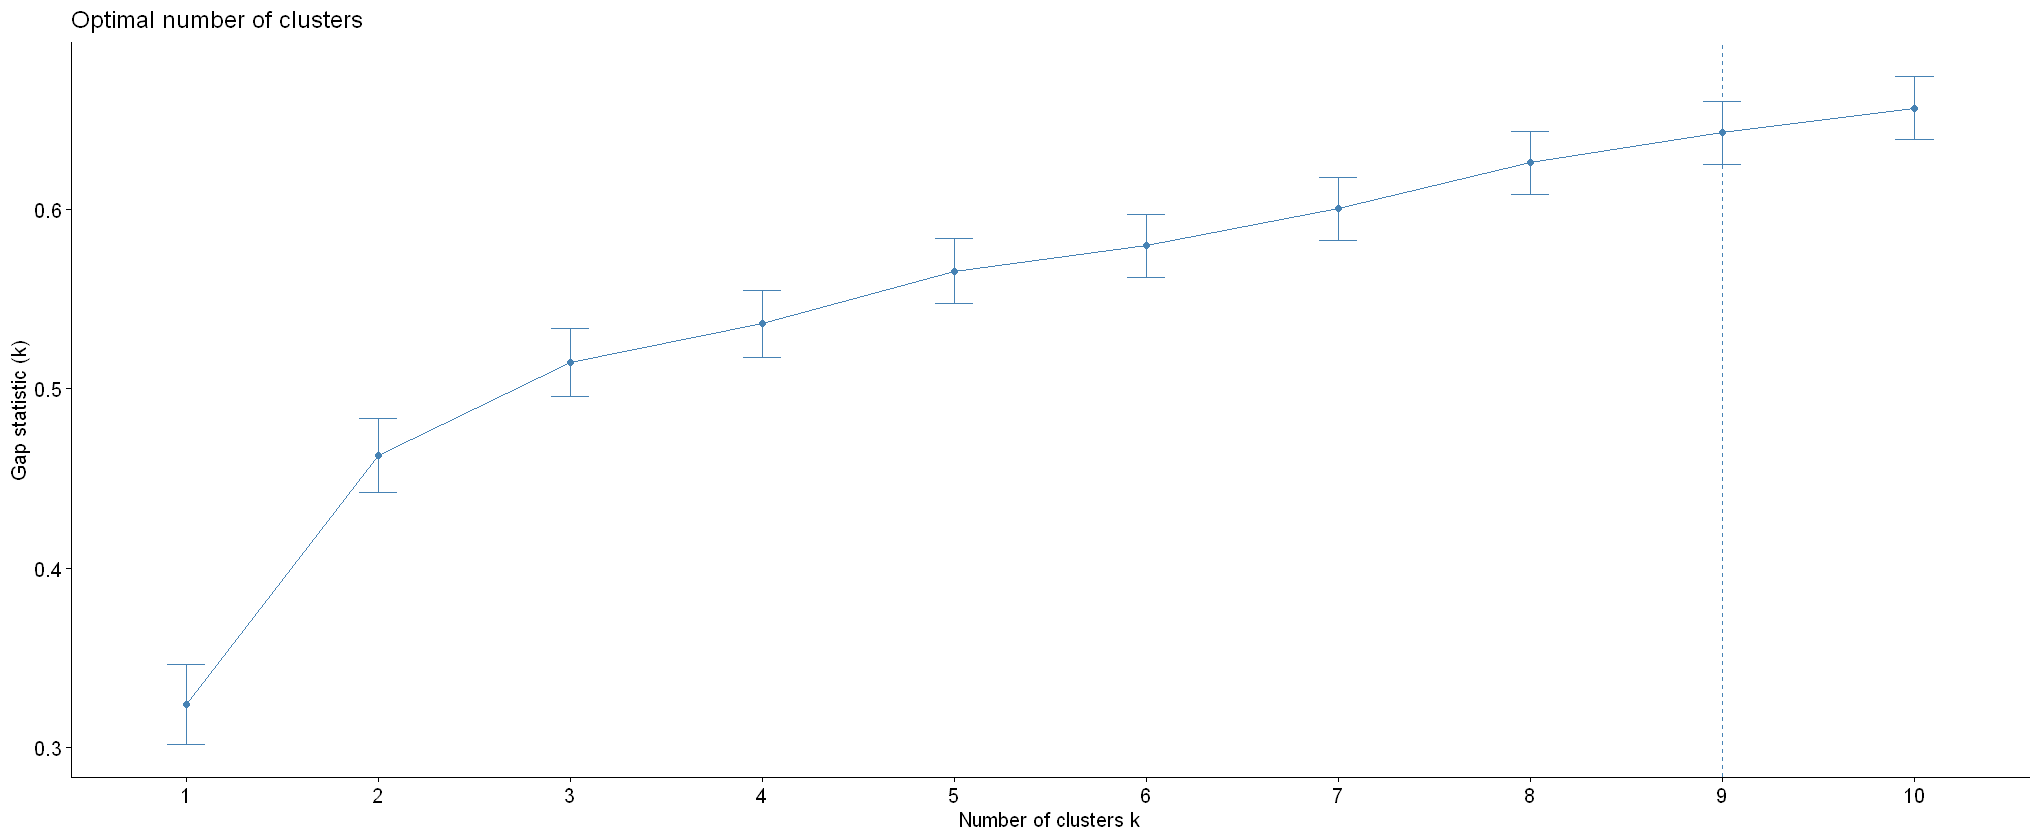

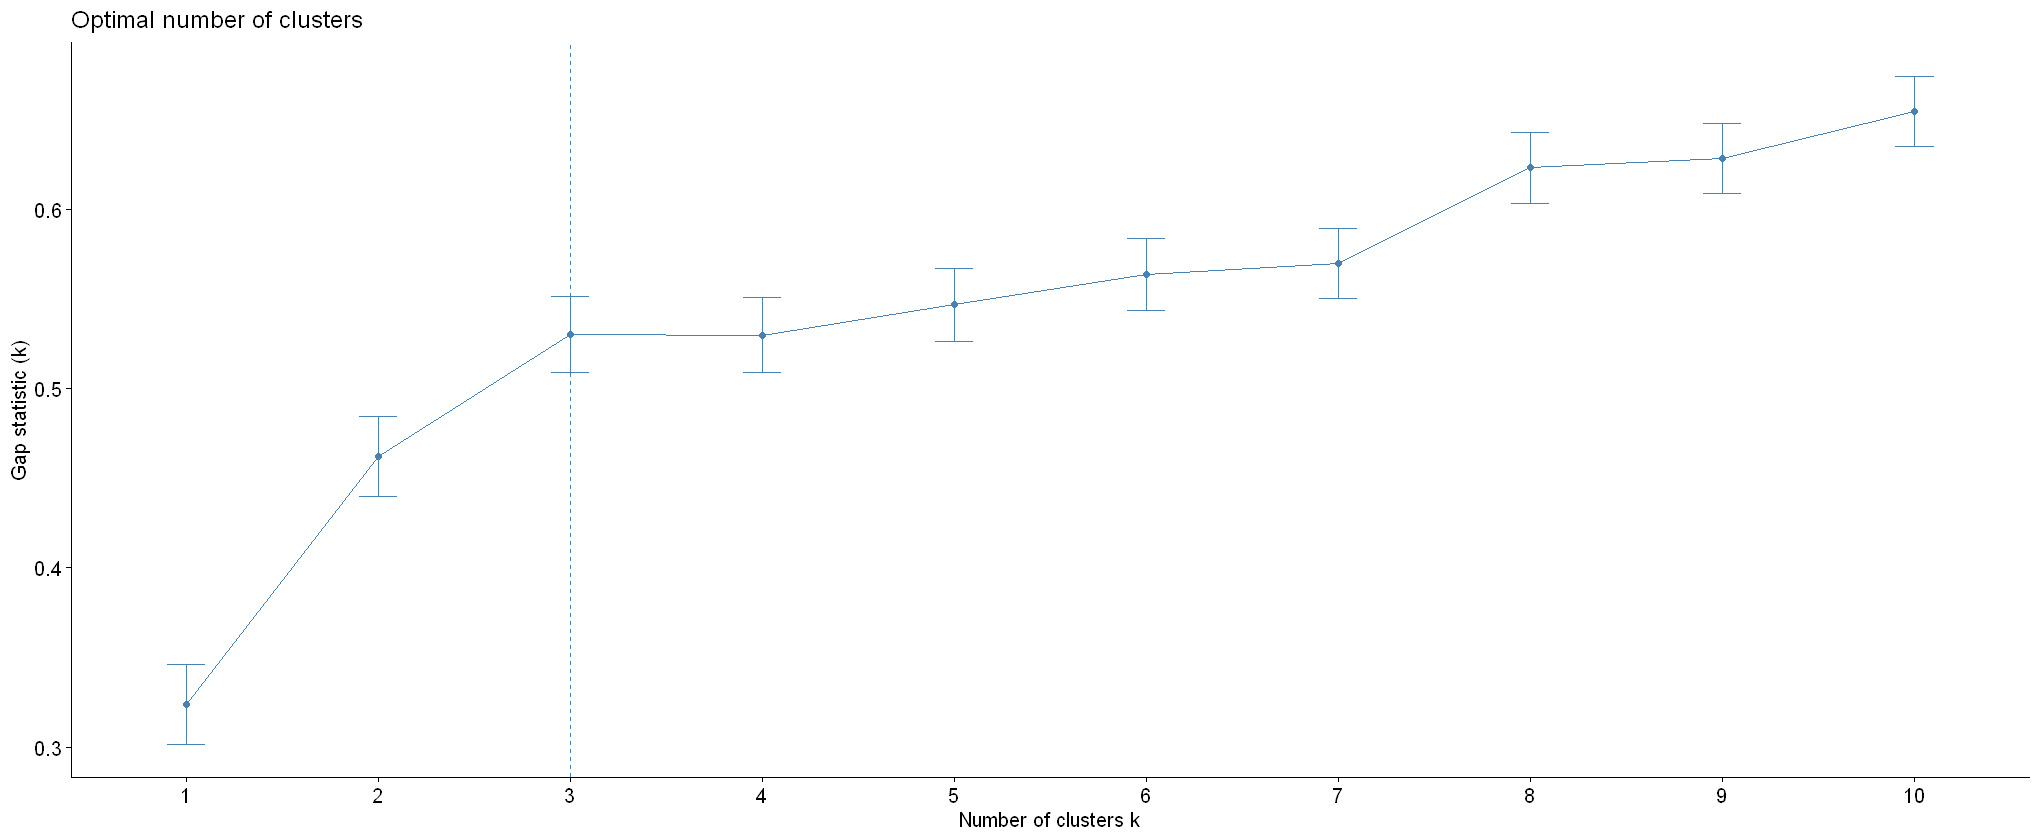

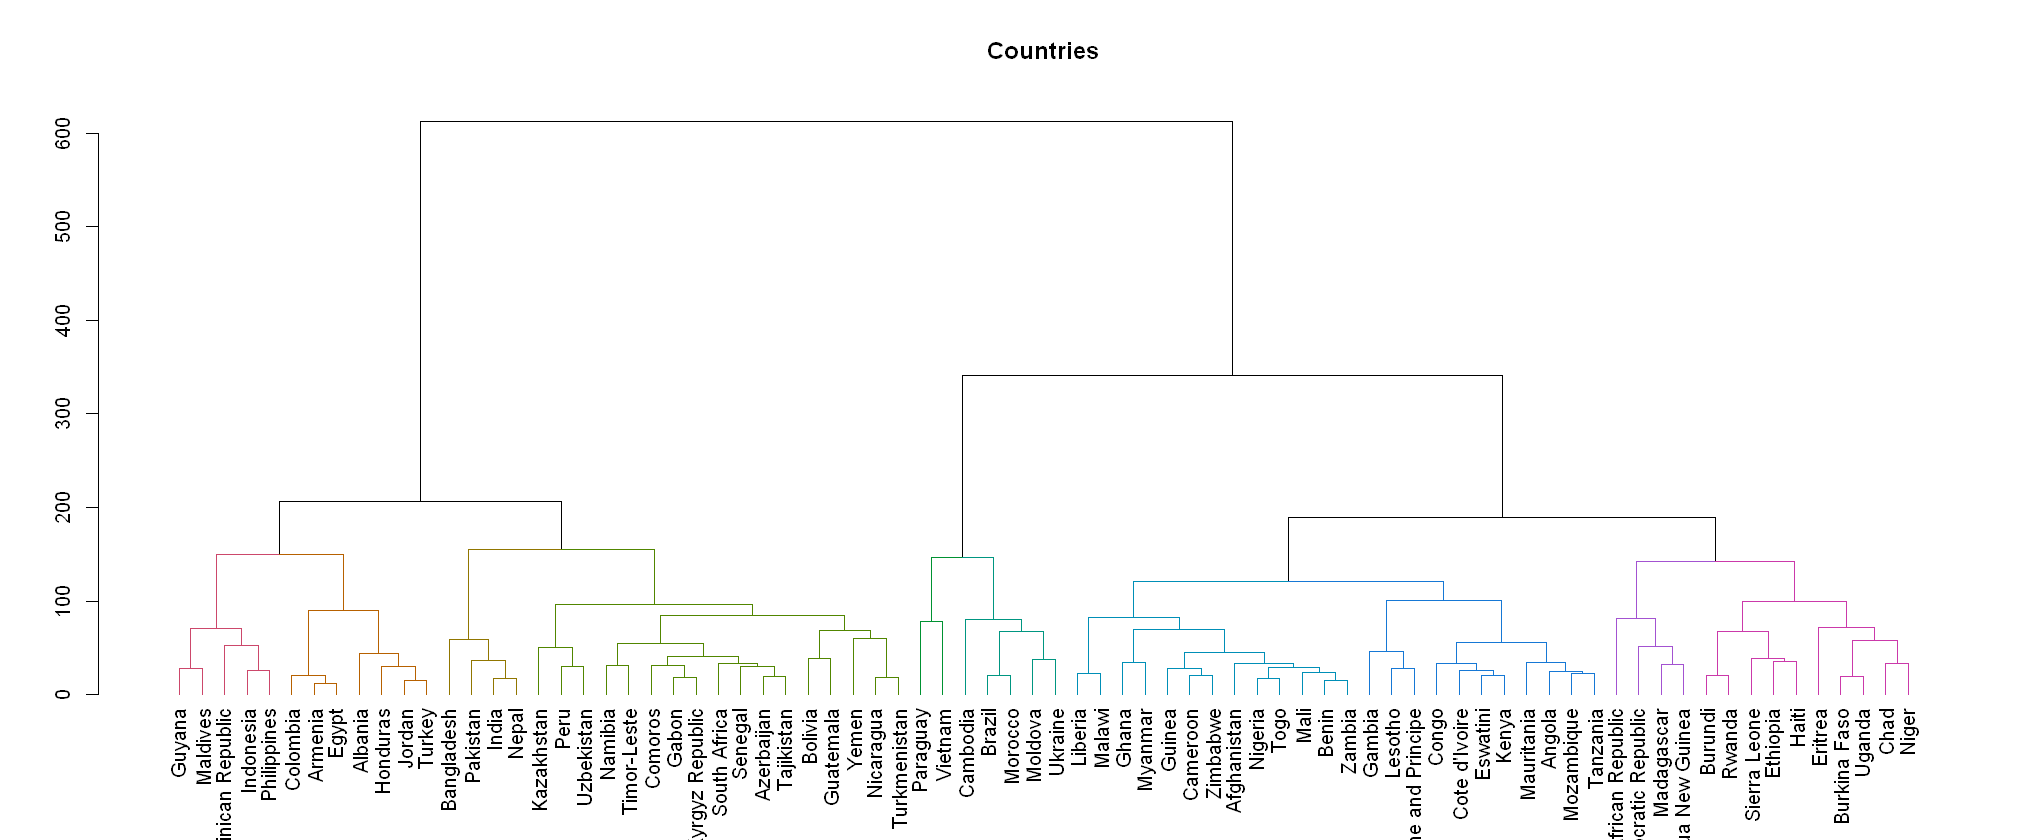

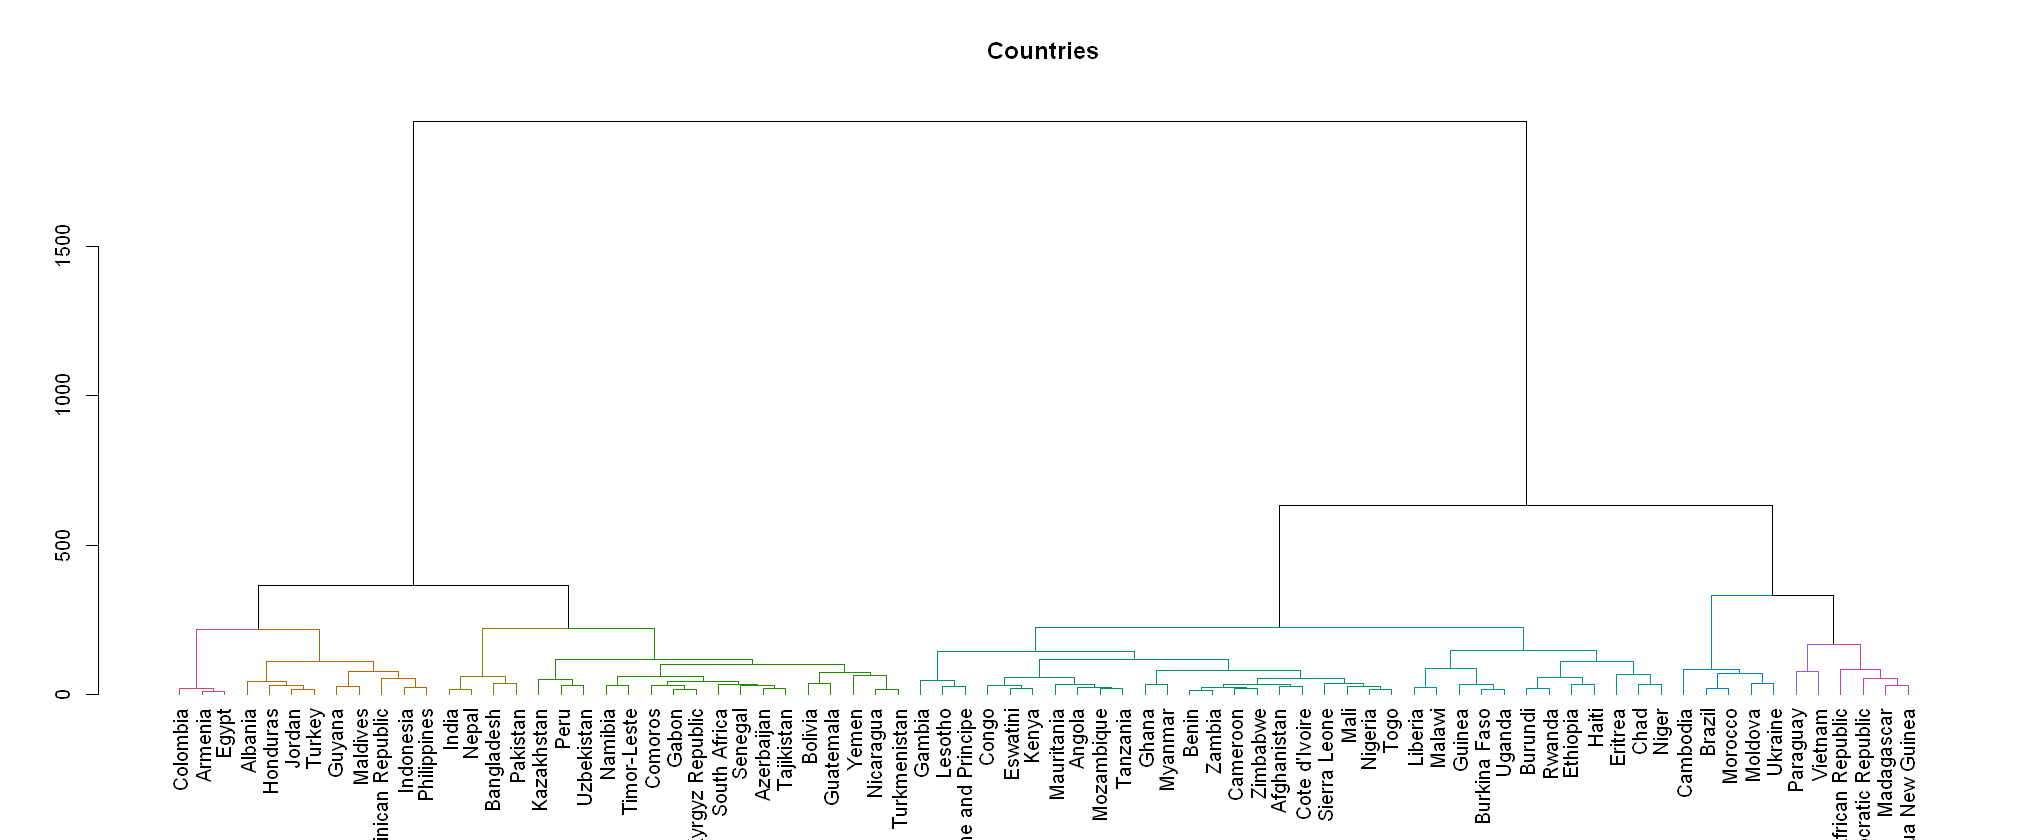

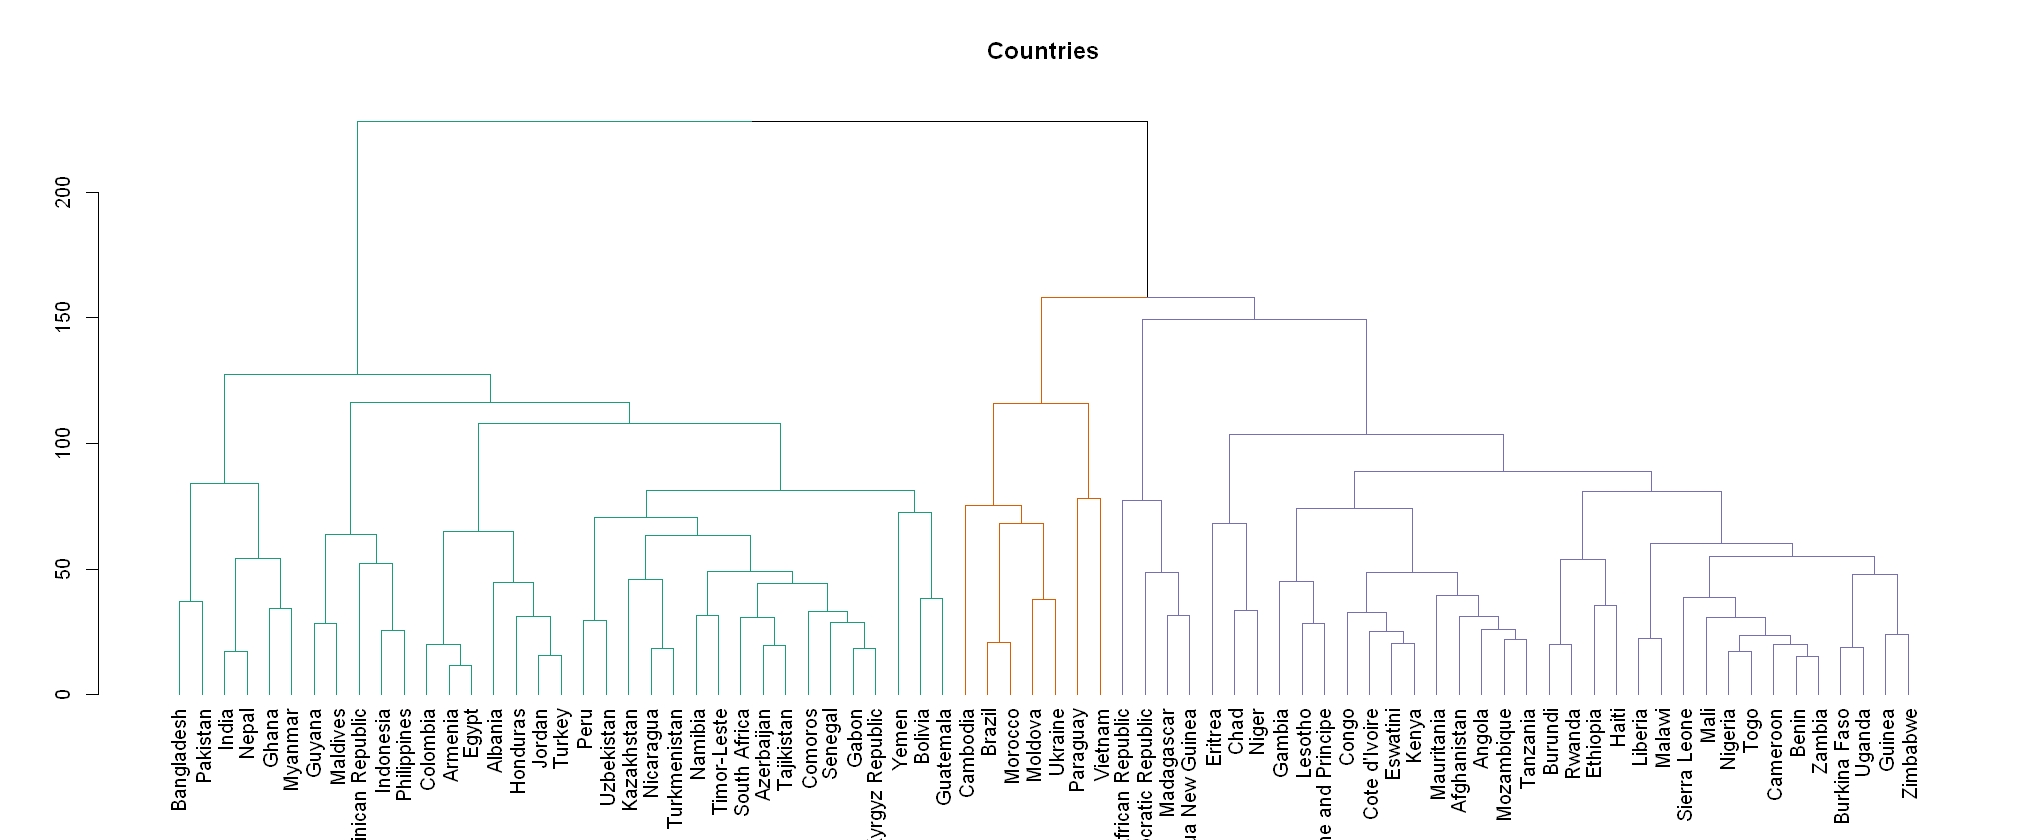

In [23]:
set.seed(123)
gap_stat <- clusGap(df.wa, hcut, hc_method ="ward.D2" ,
                    K.max = 10, B = 1000,  method = c('Tibs2001SEmax'))
fviz_gap_stat(gap_stat)


set.seed(123)
gap_stat <- clusGap(df.wa, hcut, hc_method ="ward.D" ,
                    K.max = 10, B = 1000, method ='Tibs2001SEmax', SE.factor = 1)

fviz_gap_stat(gap_stat)
set.seed(123)
gap_stat <- clusGap(df.wa, hcut, hc_method ="complete" ,
                    K.max = 10, B = 1000)
fviz_gap_stat(gap_stat)
### Fancy Clustering Graph for WARD D2 Gap ### 
dend <- as.dendrogram(hc.ward2)
dend <- color_branches(dend, k=10)

labels(dend) <- dfsimple$Country[hc.ward2$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries", xlab="", 
     ylab="", cex=.3,  )

### Ward Gap ###
dend <- as.dendrogram(hc.ward)
dend <- color_branches(dend, k=9)

labels(dend) <- dfsimple$Country[hc.ward$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries", xlab="", 
     ylab="", cex=.3,  )

### Complete Gap ###
dend <- as.dendrogram(hc.complete)
dend <- color_branches(dend, k=3,col = c("#1b9e77","#d95f02","#7570b3"))

labels(dend) <- dfsimple$Country[hc.complete$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries", xlab="", 
     ylab="", cex=.3,  )